# Clean up new feature datasets unemployment rates, poverty rate, education and vehcile

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [2]:
MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD  = [25, 9, 23, 36, 33, 34, 42, 50, 10 , 24]
NORTH_EAST = [MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD]
RI, FL,GA, NC, SC = [44, 12, 13, 37, 45] # midatlantic
AL, KY, MS, TN, WV = [1, 21, 29, 47, 45] # south east
IL, IN, IA, KS, MI,MN = [17, 18, 19, 20, 26, 27] # mid_west


daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

county_demographic = pd.read_csv('../../data/raw/county_cc-est2019-alldata.csv', encoding='latin-1')

unemployment = pd.read_excel('../../data/raw/Unemployment.xls', header=None, sheet_name=0)

# Small area income and poverty estimates
saipe2017 = pd.read_excel('../../data/raw/saipe_economic/est17all.xls')
saipe2018 = pd.read_excel('../../data/raw/saipe_economic/est18all.xls')
saipe2019 = pd.read_excel('../../data/raw/saipe_economic/est19all.xls')

educ_vehicle_2017 = pd.read_csv('../../data/processed/acs1_edu_vehicle2017.csv')
educ_vehicle_2018 = pd.read_csv('../../data/processed/acs1_edu_vehicle2018.csv')
educ_vehicle_2019 = pd.read_csv('../../data/processed/acs1_edu_vehicle2019.csv')

annual_income_by_county = pd.read_csv('../../data/raw/CAINC1__ALL_AREAS_1969_2019.csv', encoding='latin-1')


In [3]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

def get_NE_States(df, col):
    '''Method used to return North Eastern US states'''
    NE_States = (df[col] == MA) | \
                (df[col] == CT) | \
                (df[col] == ME) | \
                (df[col] == NY) | \
                (df[col] == NH) | \
                (df[col] == NJ) | \
                (df[col] == PA) | \
                (df[col] == VT) | \
                (df[col] == DE) | \
                (df[col] == MD)
    return NE_States

# Clean up Unemployment Data


In [4]:
display(unemployment)
unemployment2017_2019 = unemployment[4:]
unemployment2017_2019.reset_index(drop=True, inplace=True)
unemployment_header = unemployment2017_2019.iloc[0, :].values
unemployment2017_2019.columns = unemployment_header
unemployment2017_2019 = unemployment2017_2019.drop([0])
display(unemployment2017_2019)

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,Unemployment and median household income for t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sources: Unemployment: U.S. Department of Labo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fips_txt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,13117,11750,1367,10.4,13037,11791,1246,9.6,NaN,NaN
3276,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2718,2269,449,16.5,2585,2406,179,6.9,NaN,NaN
3277,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7311,6154,1157,15.8,7406,6231,1175,15.9,NaN,NaN
3278,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,8762,7509,1253,14.3,8691,7552,1139,13.1,NaN,NaN


,fips_txt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
1,00000,US,United States,NaN,NaN,NaN,142601667,136904680,5696987,3.99504,...,161389026,155102319,6286707,3.89537,163100055,157115247,5984808,3.66941,65712,NaN
2,01000,AL,Alabama,NaN,NaN,NaN,2133223,2035594,97629,4.6,...,2216627,2130845,85782,3.9,2241747,2174483,67264,3,51771,100
3,01001,AL,"Autauga County, AL",2,2,1,21720,20846,874,4,...,26196,25261,935,3.6,26172,25458,714,2.7,58233,112.482
4,01003,AL,"Baldwin County, AL",3,2,1,69533,66971,2562,3.7,...,95233,91809,3424,3.6,97328,94675,2653,2.7,59871,115.646
5,01005,AL,"Barbour County, AL",6,6,0,11373,10748,625,5.5,...,8414,7987,427,5.1,8537,8213,324,3.8,35972,69.4829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,13117,11750,1367,10.4,13037,11791,1246,9.6,NaN,NaN
3272,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2718,2269,449,16.5,2585,2406,179,6.9,NaN,NaN
3273,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7311,6154,1157,15.8,7406,6231,1175,15.9,NaN,NaN
3274,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,8762,7509,1253,14.3,8691,7552,1139,13.1,NaN,NaN


* fix header columns of csv file
* remove empty rows

In [5]:
# used to remove other year data to keep only 2017-2019
display(unemployment2017_2019.columns)
cols_to_remove = unemployment2017_2019.iloc[:, 3:74].columns
unemployment2017_2019 = remove_col(unemployment2017_2019, cols_to_remove)

unemployment_rates_2017_2019 = unemployment2017_2019.iloc[:, [1,2,6, 10, 14]]
display(unemployment_rates_2017_2019)

Index(['fips_txt', 'Stabr', 'area_name', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013', 'Civilian_labor_force_2000',
       'Employed_2000', 'Unemployed_2000', 'Unemployment_rate_2000',
       'Civilian_labor_force_2001', 'Employed_2001', 'Unemployed_2001',
       'Unemployment_rate_2001', 'Civilian_labor_force_2002', 'Employed_2002',
       'Unemployed_2002', 'Unemployment_rate_2002',
       'Civilian_labor_force_2003', 'Employed_2003', 'Unemployed_2003',
       'Unemployment_rate_2003', 'Civilian_labor_force_2004', 'Employed_2004',
       'Unemployed_2004', 'Unemployment_rate_2004',
       'Civilian_labor_force_2005', 'Employed_2005', 'Unemployed_2005',
       'Unemployment_rate_2005', 'Civilian_labor_force_2006', 'Employed_2006',
       'Unemployed_2006', 'Unemployment_rate_2006',
       'Civilian_labor_force_2007', 'Employed_2007', 'Unemployed_2007',
       'Unemployment_rate_2007', 'Civilian_labor_force_2008', 'Employed_2008',
       'Unemploy

,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
1,US,United States,4.35512,3.89537,3.66941
2,AL,Alabama,4.4,3.9,3
3,AL,"Autauga County, AL",3.9,3.6,2.7
4,AL,"Baldwin County, AL",4.1,3.6,2.7
5,AL,"Barbour County, AL",5.8,5.1,3.8
...,...,...,...,...,...
3271,PR,"Vega Baja Municipio, PR",12.4,10.4,9.6
3272,PR,"Vieques Municipio, PR",14.5,16.5,6.9
3273,PR,"Villalba Municipio, PR",19.4,15.8,15.9
3274,PR,"Yabucoa Municipio, PR",16.5,14.3,13.1


* remove all other column data for years 2000 - 2016
* make a df for only unemployment rates

In [6]:
# Retain only counties and not regions / individual state

UE_counties = unemployment_rates_2017_2019['area_name'].str.contains(',')
UE_county_rate = unemployment_rates_2017_2019.loc[UE_counties]

In [7]:
# check for missing values and dupes

display(UE_county_rate.isnull().sum())
display(UE_county_rate.loc[UE_county_rate.isnull().any(axis=1)])

daily_aqi_by_county_2018.loc[daily_aqi_by_county_2018['State Name'].str.contains('Alaska') & daily_aqi_by_county_2018['county Name'].str.contains('Prince')]
daily_aqi_by_county_2018.loc[daily_aqi_by_county_2018['State Name'].str.contains('Alaska') & daily_aqi_by_county_2018['county Name'].str.contains('Skagway')]
daily_aqi_by_county_2018.loc[daily_aqi_by_county_2018['State Name'].str.contains('Alaska') & daily_aqi_by_county_2018['county Name'].str.contains('Wrangell')]

UE_county_rate.dropna(inplace=True)
UE_county_rate.reset_index(drop=True, inplace=True)

Stabr                     0
area_name                 0
Unemployment_rate_2017    3
Unemployment_rate_2018    3
Unemployment_rate_2019    3
dtype: int64

,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
93,AK,"Prince of Wales-Outer Ketchikan Census Area, AK",NaN,NaN,NaN
96,AK,"Skagway-Hoonah-Angoon Census Area, AK",NaN,NaN,NaN
100,AK,"Wrangell-Petersburg Census Area, AK",NaN,NaN,NaN


<ipython-input-7-6b6aaf1a981a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UE_county_rate.dropna(inplace=True)


* 3 alaskan counties show unknown values;
* These values will not be mergeable with aqi data as it we do not aqi data on those areas
* drop these rows


In [8]:
# check if have any duplicate value
print(UE_county_rate['area_name'].duplicated().sum())

0


* we have 0 duplicates

In [9]:
display(UE_county_rate.info())

UE_county_rate['Unemployment_rate_2017'] = pd.to_numeric(UE_county_rate['Unemployment_rate_2017'], downcast='float')
UE_county_rate['Unemployment_rate_2018'] = pd.to_numeric(UE_county_rate['Unemployment_rate_2018'], downcast='float')
UE_county_rate['Unemployment_rate_2019'] = pd.to_numeric(UE_county_rate['Unemployment_rate_2019'], downcast='float')

UE_county_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Stabr                   3218 non-null   object
 1   area_name               3218 non-null   object
 2   Unemployment_rate_2017  3218 non-null   object
 3   Unemployment_rate_2018  3218 non-null   object
 4   Unemployment_rate_2019  3218 non-null   object
dtypes: object(5)
memory usage: 125.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Stabr                   3218 non-null   object 
 1   area_name               3218 non-null   object 
 2   Unemployment_rate_2017  3218 non-null   float32
 3   Unemployment_rate_2018  3218 non-null   float32
 4   Unemployment_rate_2019  3218 non-null   float32
dtypes: flo

None

<ipython-input-9-0645ef7acb33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UE_county_rate['Unemployment_rate_2017'] = pd.to_numeric(UE_county_rate['Unemployment_rate_2017'], downcast='float')
<ipython-input-9-0645ef7acb33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UE_county_rate['Unemployment_rate_2018'] = pd.to_numeric(UE_county_rate['Unemployment_rate_2018'], downcast='float')
<ipython-input-9-0645ef7acb33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

* convert Unemployment rate columsn to be type float


In [10]:
#order then plot top 100 and bottom 100
UE_county_rate
display(UE_county_rate.sort_values(by='Unemployment_rate_2017').head(10))
display(UE_county_rate.sort_values(by='Unemployment_rate_2018').head(10))
display(UE_county_rate.sort_values(by='Unemployment_rate_2019').head(10))

display(UE_county_rate.sort_values(by='Unemployment_rate_2017', ascending=False).head(10))
display(UE_county_rate.sort_values(by='Unemployment_rate_2018', ascending=False).head(10))
display(UE_county_rate.sort_values(by='Unemployment_rate_2019', ascending=False).head(10))

,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
292,CO,"Phillips County, CO",1.6,1.9,1.6
1999,ND,"Divide County, ND",1.6,1.3,1.4
307,CO,"Yuma County, CO",1.6,1.9,1.6
248,CO,"Baca County, CO",1.6,1.8,1.7
2033,ND,"Steele County, ND",1.7,2.0,2.1
276,CO,"Kit Carson County, CO",1.7,2.0,1.7
275,CO,"Kiowa County, CO",1.7,1.8,1.6
921,KS,"Greeley County, KS",1.8,2.0,2.3
273,CO,"Jackson County, CO",1.8,2.6,2.3
1998,ND,"Dickey County, ND",1.8,1.8,1.9


,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
1999,ND,"Divide County, ND",1.6,1.3,1.4
2671,TX,"Loving County, TX",5.0,1.5,0.7
846,IA,"Lyon County, IA",1.8,1.6,1.6
2000,ND,"Dunn County, ND",2.2,1.6,1.6
2018,ND,"Mountrail County, ND",2.1,1.6,1.4
2014,ND,"McKenzie County, ND",2.5,1.7,1.6
871,IA,"Story County, IA",2.0,1.7,1.9
275,CO,"Kiowa County, CO",1.7,1.8,1.6
2676,TX,"McMullen County, TX",1.9,1.8,1.6
870,IA,"Sioux County, IA",2.0,1.8,1.9


,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
2671,TX,"Loving County, TX",5.0,1.5,0.7
2018,ND,"Mountrail County, ND",2.1,1.6,1.4
1999,ND,"Divide County, ND",1.6,1.3,1.4
2676,TX,"McMullen County, TX",1.9,1.8,1.6
307,CO,"Yuma County, CO",1.6,1.9,1.6
253,CO,"Cheyenne County, CO",1.8,1.8,1.6
292,CO,"Phillips County, CO",1.6,1.9,1.6
2000,ND,"Dunn County, ND",2.2,1.6,1.6
2014,ND,"McKenzie County, ND",2.5,1.7,1.6
2623,TX,"Hartley County, TX",1.9,1.8,1.6


,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
3182,PR,"Las Marias Municipio, PR",20.600000,14.100000,11.600000
3187,PR,"Maricao Municipio, PR",20.100000,15.100000,13.700000
3195,PR,"Patillas Municipio, PR",19.700001,17.500000,15.700000
81,AK,"Kusilvak Census Area, AK",19.600000,19.600000,19.299999
198,CA,"Imperial County, CA",19.500000,18.900000,18.299999
3215,PR,"Villalba Municipio, PR",19.400000,15.800000,15.900000
3180,PR,"Lajas Municipio, PR",19.400000,15.300000,12.800000
3202,PR,"Salinas Municipio, PR",18.700001,14.800000,14.500000
3181,PR,"Lares Municipio, PR",18.600000,16.200001,14.700000
3168,PR,"Guanica Municipio, PR",18.299999,15.500000,14.800000


,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
81,AK,"Kusilvak Census Area, AK",19.600000,19.600000,19.299999
198,CA,"Imperial County, CA",19.500000,18.900000,18.299999
3195,PR,"Patillas Municipio, PR",19.700001,17.500000,15.700000
110,AZ,"Yuma County, AZ",16.900000,16.700001,16.400000
3214,PR,"Vieques Municipio, PR",14.500000,16.500000,6.900000
3181,PR,"Lares Municipio, PR",18.600000,16.200001,14.700000
3215,PR,"Villalba Municipio, PR",19.400000,15.800000,15.900000
3168,PR,"Guanica Municipio, PR",18.299999,15.500000,14.800000
3180,PR,"Lajas Municipio, PR",19.400000,15.300000,12.800000
3188,PR,"Maunabo Municipio, PR",17.299999,15.200000,15.100000


,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
81,AK,"Kusilvak Census Area, AK",19.600000,19.600000,19.299999
198,CA,"Imperial County, CA",19.500000,18.900000,18.299999
110,AZ,"Yuma County, AZ",16.900000,16.700001,16.400000
3215,PR,"Villalba Municipio, PR",19.400000,15.800000,15.900000
3195,PR,"Patillas Municipio, PR",19.700001,17.500000,15.700000
1430,MS,"Jefferson County, MS",14.600000,13.200000,15.500000
3140,PR,"Adjuntas Municipio, PR",15.100000,13.700000,15.300000
3188,PR,"Maunabo Municipio, PR",17.299999,15.200000,15.100000
3168,PR,"Guanica Municipio, PR",18.299999,15.500000,14.800000
3181,PR,"Lares Municipio, PR",18.600000,16.200001,14.700000


* Don't have consistent low unemployment by years
* Puerto Rico counties appear to have highest unemployment rate over time


No handles with labels found to put in legend.


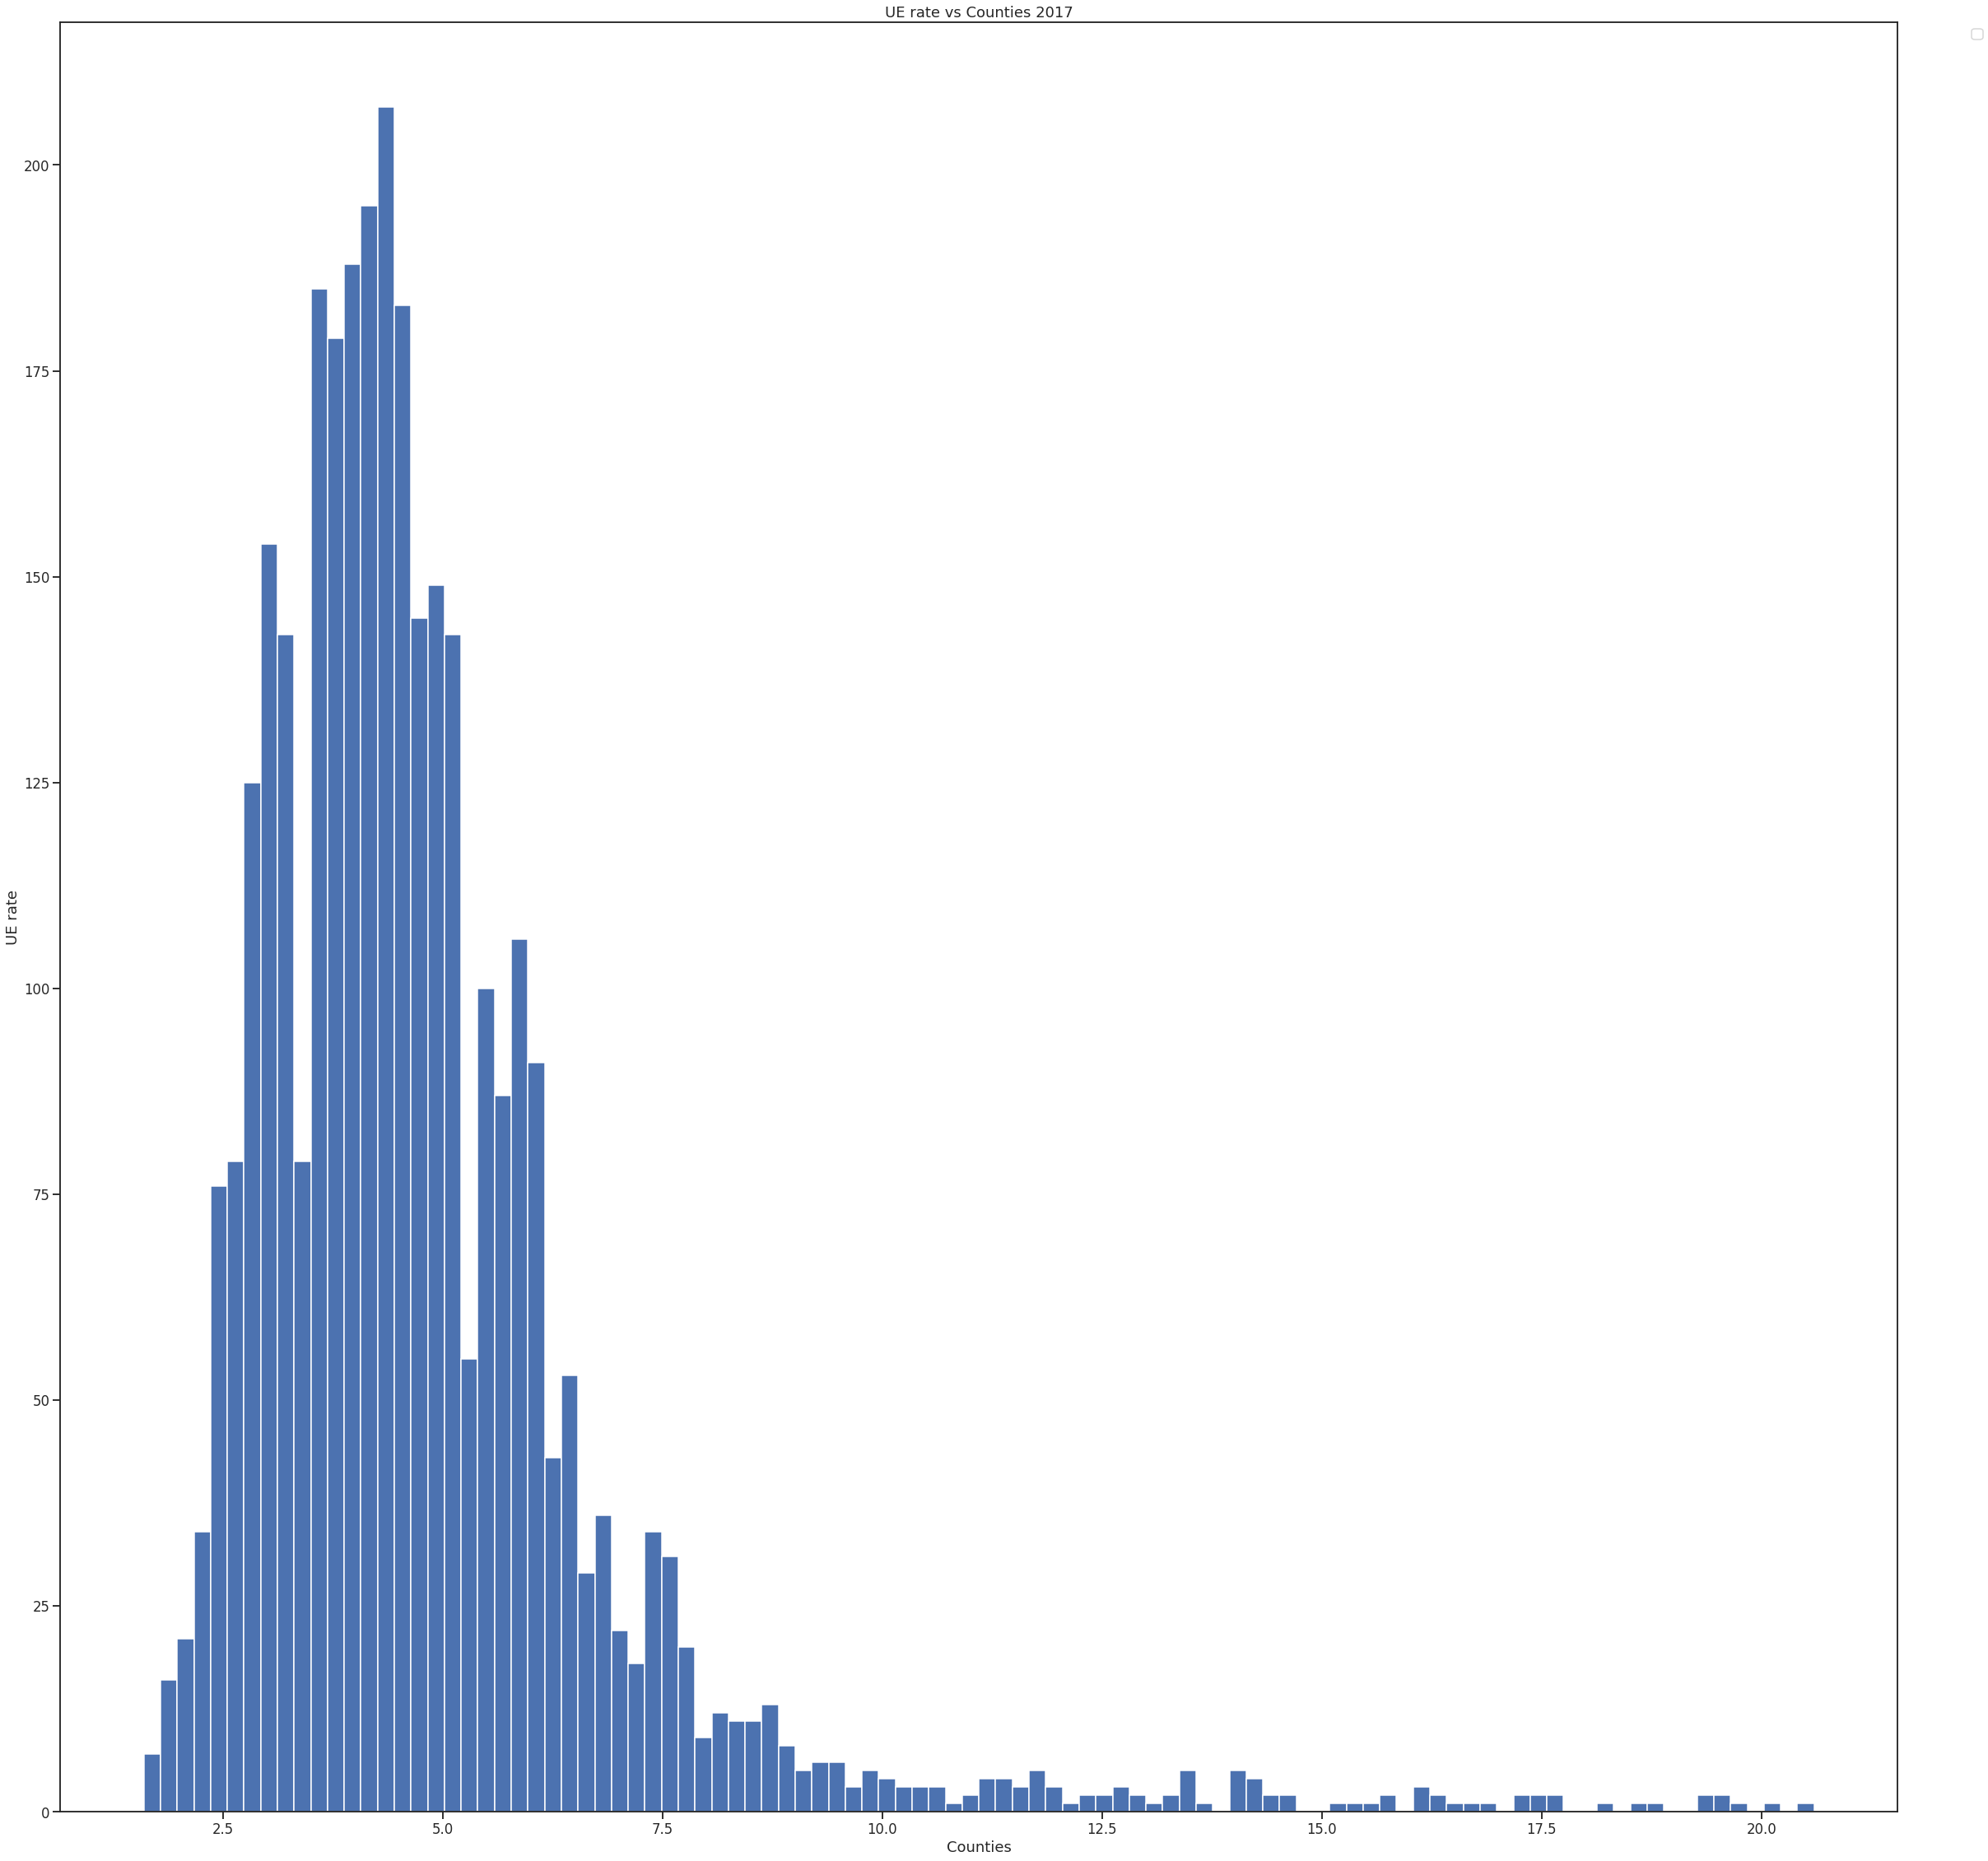

In [11]:
fig, ax = plt.subplots(figsize=(40,40))

plt.title('UE rate vs Counties 2017')
plt.xlabel('Counties')
plt.ylabel('UE rate')
# ax.scatter(UE_county_rate['area_name'], UE_county_rate['Unemployment_rate_2017'], label=sorted_UE_2017['area_name'])
ax.hist(UE_county_rate['Unemployment_rate_2017'], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()


* In 2017 it appears that Unemployment rates from 2.5 to 7.5 are normal
* data is skewed to right

# clean up saipe data 2017


In [12]:

saipe_header = saipe2017.iloc[2, :].values
saipe_header
saipe2017.columns = saipe_header
saipe2017.drop([0,1,2], inplace=True)
saipe2017.reset_index(drop=True, inplace=True)
display(saipe2017)

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,000,US,United States,42583651,42342619,42824683,13.4,13.3,13.5,...,17.5,60336,60250,60422,3932969,3880645,3985293,20.2,19.9,20.5
1,01,000,AL,Alabama,802263,784517,820009,16.9,16.5,17.3,...,23.8,48193,47451,48935,78986,75009,82963,27.7,26.3,29.1
2,01,001,AL,Autauga County,7390,6147,8633,13.4,11.1,15.7,...,22.1,58343,52121,64565,.,.,.,.,.,.
3,01,003,AL,Baldwin County,21199,17444,24954,10.1,8.3,11.9,...,17.9,56607,52439,60775,.,.,.,.,.,.
4,01,005,AL,Barbour County,7414,6325,8503,33.4,28.5,38.3,...,55,32490,29218,35762,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,037,WY,Sweetwater County,4253,3540,4966,10,8.3,11.7,...,14,75590,69190,81990,.,.,.,.,.,.
3190,56,039,WY,Teton County,1348,1021,1675,5.8,4.4,7.2,...,7.9,90145,80434,99856,.,.,.,.,.,.
3191,56,041,WY,Uinta County,2067,1623,2511,10.2,8,12.4,...,13.4,67404,60925,73883,.,.,.,.,.,.
3192,56,043,WY,Washakie County,845,632,1058,10.7,8,13.4,...,17.3,57989,53142,62836,.,.,.,.,.,.


In [13]:
saipe2017.columns
saipe2017.iloc[:, [1,2,3,4,7]]
saipe_county = saipe2017['Name'].str.contains('County')
pov_rate_2017 = saipe2017.loc[saipe_county].iloc[:, [1,2,3, 7]]
pov_rate_2017.reset_index(drop=True, inplace=True)
display(pov_rate_2017)

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
0,001,AL,Autauga County,13.4
1,003,AL,Baldwin County,10.1
2,005,AL,Barbour County,33.4
3,007,AL,Bibb County,20.2
4,009,AL,Blount County,12.8
...,...,...,...,...
3002,037,WY,Sweetwater County,10
3003,039,WY,Teton County,5.8
3004,041,WY,Uinta County,10.2
3005,043,WY,Washakie County,10.7


* Remove empty cells and clean up columns
* Retain only US county information and poverty rates for all ages


In [14]:
print(pov_rate_2017.isnull().sum())
print(pov_rate_2017.duplicated().sum())
display(pov_rate_2017.info())

County FIPS Code             0
Postal Code                  0
Name                         0
Poverty Percent, All Ages    0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   County FIPS Code           3007 non-null   object
 1   Postal Code                3007 non-null   object
 2   Name                       3007 non-null   object
 3   Poverty Percent, All Ages  3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


None

* No duplicates or missing values for poverty rates in 2017
* also convert poverty percent to float

In [15]:
pov_rate_2017.info()

pov_rate_2017.drop(518, inplace=True)
pov_rate_2017['Poverty Percent, All Ages'] = pd.to_numeric(pov_rate_2017['Poverty Percent, All Ages'], downcast='float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   County FIPS Code           3007 non-null   object
 1   Postal Code                3007 non-null   object
 2   Name                       3007 non-null   object
 3   Poverty Percent, All Ages  3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


* from further inspection it was noted that Kalawao county is now excluded in their survey results starting 2017
* Kalawao county records removed
* Poverty rates in Hawaii appear to around 10-20s


No handles with labels found to put in legend.


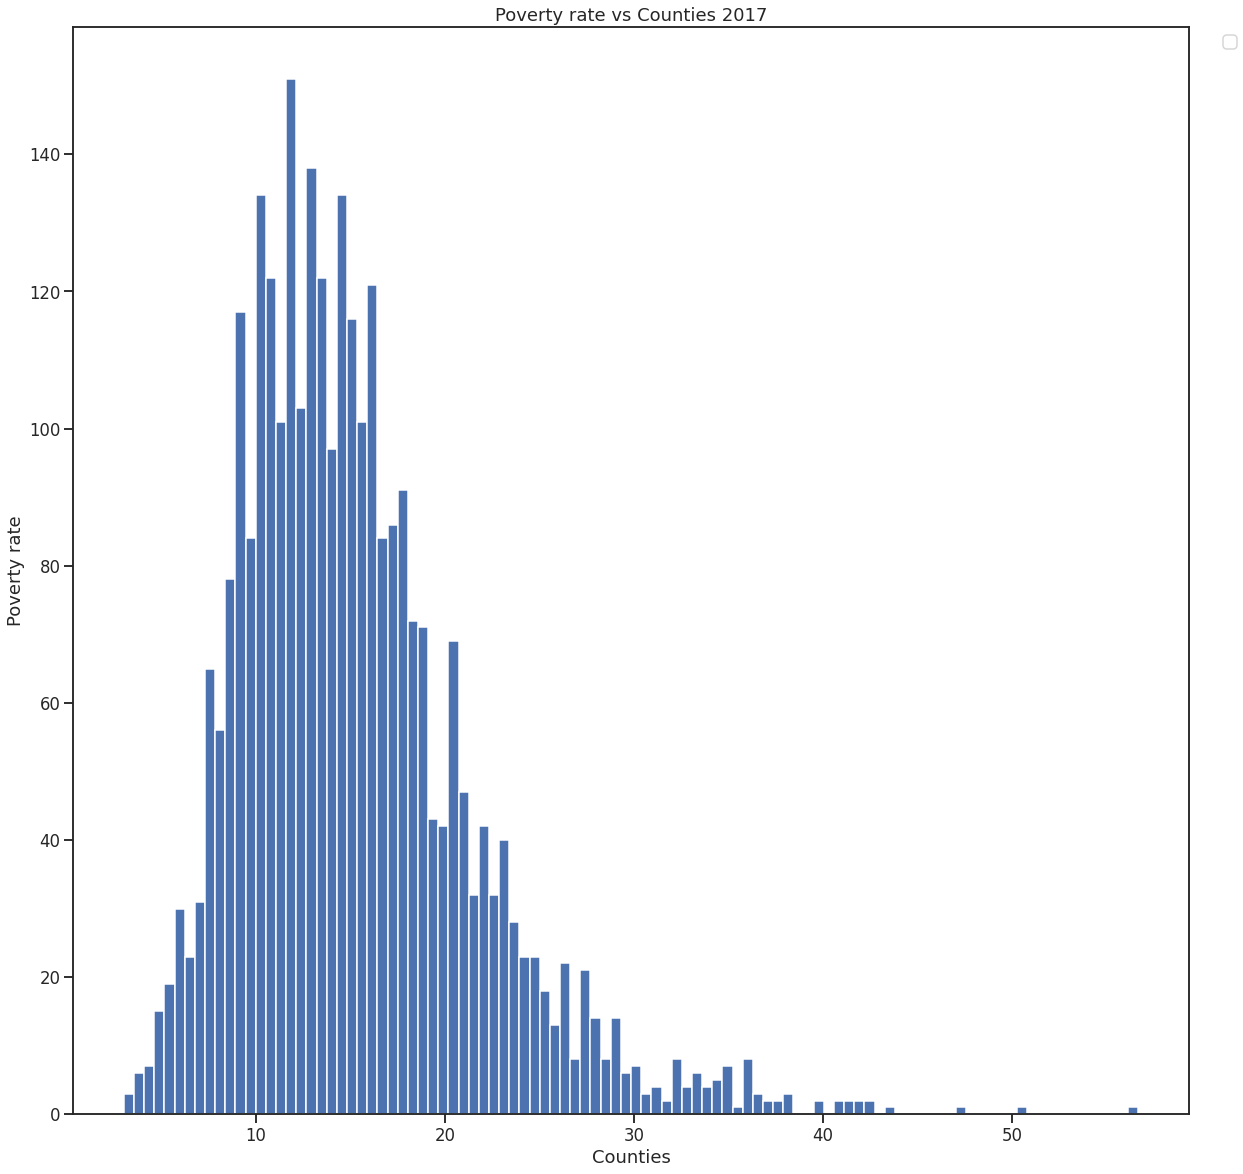

In [16]:
fig, ax = plt.subplots(figsize=(20,20))

plt.title('Poverty rate vs Counties 2017')
plt.xlabel('Counties')
plt.ylabel('Poverty rate')
ax.hist(pov_rate_2017['Poverty Percent, All Ages'], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()


* poverty rates in 2017 US counties appear to be between 10 to 20


In [17]:
display(pov_rate_2017.sort_values(by='Poverty Percent, All Ages').head(10))
display(pov_rate_2017.sort_values(by='Poverty Percent, All Ages', ascending=False).head(10))

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
2775,107,VA,Loudoun County,3.0
233,035,CO,Douglas County,3.2
2305,083,SD,Lincoln County,3.5
1713,028,NM,Los Alamos County,3.7
695,057,IN,Hamilton County,3.8
1686,019,NJ,Hunterdon County,3.9
2424,187,TN,Williamson County,3.9
1288,139,MN,Scott County,4.0
1228,019,MN,Carver County,4.0
2694,029,UT,Morgan County,4.1


,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
2330,137,SD,Ziebach County,56.700001
2324,121,SD,Todd County,50.400002
228,025,CO,Crowley County,47.400002
2272,017,SD,Buffalo County,43.299999
1316,021,MS,Claiborne County,42.599998
2279,031,SD,Corson County,42.400002
1347,083,MS,Leflore County,42.200001
988,051,KY,Clay County,41.700001
2315,102,SD,Oglala Lakota County,41.500000
1010,095,KY,Harlan County,41.500000


* Puerto Rico is not found and that is because poverty county data for Puerto Rico is in a separate set
* Need to add Puerto Rico

# Repeat clean up steps on saipe data 2018


In [18]:
# clean up saipe data 2018

saipe_header = saipe2018.iloc[2, :].values
saipe_header
saipe2018.columns = saipe_header
saipe2018.drop([0,1,2], inplace=True)
saipe2018.reset_index(drop=True, inplace=True)
saipe2018

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,000,US,United States,41852315,41619366,42085264,13.1,13,13.2,...,17.2,61937,61843,62031,3758704,3714862,3802546,19.5,19.3,19.7
1,01,000,AL,Alabama,801758,785668,817848,16.8,16.5,17.1,...,23.7,49881,49123,50639,73915,69990,77840,26,24.6,27.4
2,01,001,AL,Autauga County,7587,6334,8840,13.8,11.5,16.1,...,23.9,59338,53628,65048,.,.,.,.,.,.
3,01,003,AL,Baldwin County,21069,17390,24748,9.8,8.1,11.5,...,16.9,57588,54437,60739,.,.,.,.,.,.
4,01,005,AL,Barbour County,6788,5662,7914,30.9,25.8,36,...,45.9,34382,31157,37607,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,037,WY,Sweetwater County,3540,2804,4276,8.4,6.7,10.1,...,11.2,73315,67141,79489,.,.,.,.,.,.
3190,56,039,WY,Teton County,1443,1137,1749,6.3,5,7.6,...,7.7,99087,88142,110032,.,.,.,.,.,.
3191,56,041,WY,Uinta County,2010,1585,2435,10,7.9,12.1,...,14,63401,56812,69990,.,.,.,.,.,.
3192,56,043,WY,Washakie County,918,700,1136,11.9,9.1,14.7,...,19.3,55190,49263,61117,.,.,.,.,.,.


In [19]:
saipe2018.columns
saipe2018.iloc[:, [1,2,3,4,7]]
saipe_county = saipe2018['Name'].str.contains('County')
pov_rate_2018 = saipe2018.loc[saipe_county].iloc[:, [1,2,3, 7]]
pov_rate_2018.reset_index(drop=True, inplace=True)
display(pov_rate_2018)

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
0,001,AL,Autauga County,13.8
1,003,AL,Baldwin County,9.8
2,005,AL,Barbour County,30.9
3,007,AL,Bibb County,21.8
4,009,AL,Blount County,13.2
...,...,...,...,...
3002,037,WY,Sweetwater County,8.4
3003,039,WY,Teton County,6.3
3004,041,WY,Uinta County,10
3005,043,WY,Washakie County,11.9


* Remove empty cells and clean up columns
* Retain only US county information and poverty rates for all ages


In [20]:
print(pov_rate_2018.isnull().sum())
print(pov_rate_2018.duplicated().sum())
display(pov_rate_2018.info())

County FIPS Code             0
Postal Code                  0
Name                         0
Poverty Percent, All Ages    0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   County FIPS Code           3007 non-null   object
 1   Postal Code                3007 non-null   object
 2   Name                       3007 non-null   object
 3   Poverty Percent, All Ages  3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


None

* No duplicates or missing values for poverty rates in 2018
* also convert poverty percent to float

In [21]:
pov_rate_2018.drop(518, inplace=True)
pov_rate_2018['Poverty Percent, All Ages'] = pd.to_numeric(pov_rate_2018['Poverty Percent, All Ages'], downcast='float')


* from further inspection it was noted that Kalawao county is now excluded in their survey results starting 2017
* Kalawao county records removed
* Poverty rates in Hawaii appear to around 10-20s

No handles with labels found to put in legend.


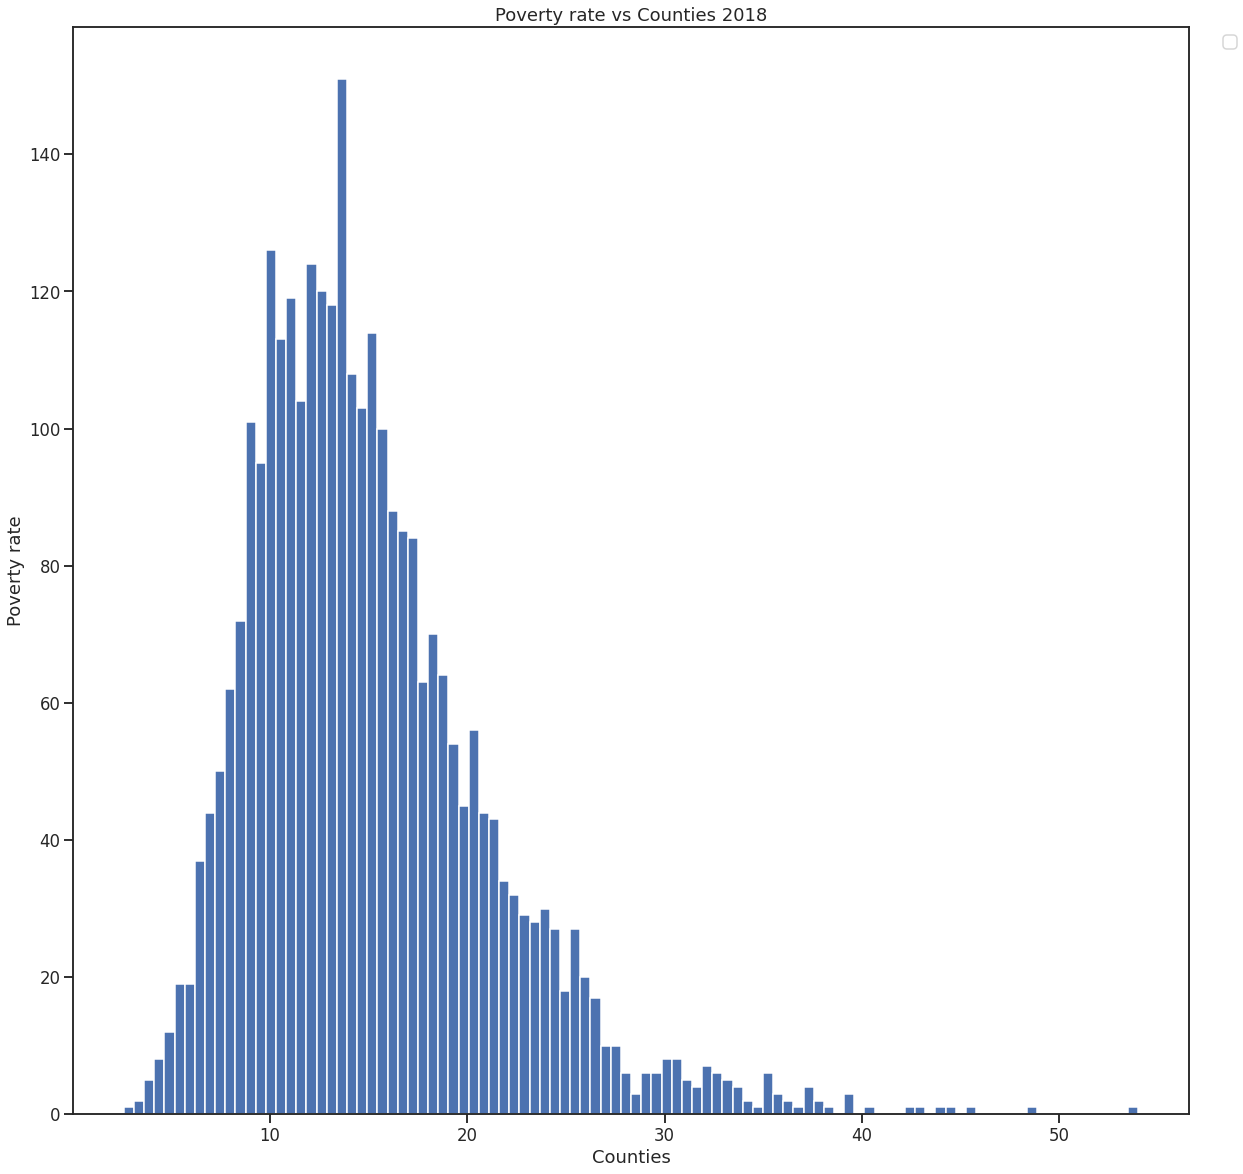

In [22]:
fig, ax = plt.subplots(figsize=(20,20))

plt.title('Poverty rate vs Counties 2018')
plt.xlabel('Counties')
plt.ylabel('Poverty rate')
ax.hist(pov_rate_2018['Poverty Percent, All Ages'], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [23]:
display(pov_rate_2018.sort_values(by='Poverty Percent, All Ages').head(10))
display(pov_rate_2018.sort_values(by='Poverty Percent, All Ages', ascending=False).head(10))

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
233,035,CO,Douglas County,2.6
2576,301,TX,Loving County,3.3
2775,107,VA,Loudoun County,3.6
2424,187,TN,Williamson County,3.8
1228,019,MN,Carver County,3.8
1713,028,NM,Los Alamos County,3.9
2694,029,UT,Morgan County,4.0
1966,041,OH,Delaware County,4.1
611,093,IL,Kendall County,4.2
2957,089,WI,Ozaukee County,4.2


,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
2315,102,SD,Oglala Lakota County,54.000000
2324,121,SD,Todd County,48.400002
2272,017,SD,Buffalo County,45.700001
228,025,CO,Crowley County,44.299999
2330,137,SD,Ziebach County,43.900002
120,077,AR,Lee County,43.000000
5,011,AL,Bullock County,42.500000
1333,055,MS,Issaquena County,40.500000
509,309,GA,Wheeler County,39.599998
1057,189,KY,Owsley County,39.200001


* Puerto Rico is not found and that is because poverty county data for Puerto Rico is in a separate set
* But poverty ranking appear to be same from 2017

# Repeat clean up steps for saipe data 2019

In [24]:

saipe_header = saipe2019.iloc[2, :].values
saipe_header
saipe2019.columns = saipe_header
saipe2019.drop([0,1,2], inplace=True)
saipe2019.reset_index(drop=True, inplace=True)
saipe2019

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,000,US,United States,39490096,39248096,39732096,12.3,12.2,12.4,...,16,65712,65594,65830,3457689,3405854,3509524,18.2,17.9,18.5
1,01,000,AL,Alabama,747478,730491,764465,15.6,15.2,16,...,21.6,51771,51179,52363,69236,65296,73176,24.2,22.8,25.6
2,01,001,AL,Autauga County,6723,5517,7929,12.1,9.9,14.3,...,19.4,58233,52517,63949,.,.,.,.,.,.
3,01,003,AL,Baldwin County,22360,18541,26179,10.1,8.4,11.8,...,17.2,59871,54593,65149,.,.,.,.,.,.
4,01,005,AL,Barbour County,5909,4787,7031,27.1,22,32.2,...,49,35972,31822,40122,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,037,WY,Sweetwater County,3453,2743,4163,8.3,6.6,10,...,11.1,80639,73437,87841,.,.,.,.,.,.
3190,56,039,WY,Teton County,1396,1073,1719,6,4.6,7.4,...,6.7,98837,86531,111143,.,.,.,.,.,.
3191,56,041,WY,Uinta County,1699,1264,2134,8.5,6.3,10.7,...,11.1,70756,63191,78321,.,.,.,.,.,.
3192,56,043,WY,Washakie County,845,626,1064,11.1,8.2,14,...,17.4,55122,50050,60194,.,.,.,.,.,.


In [25]:
saipe2019.columns
saipe2019.iloc[:, [1,2,3,4,7]]
saipe_county = saipe2019['Name'].str.contains('County')
pov_rate_2019 = saipe2019.loc[saipe_county].iloc[:, [1,2,3, 7]]
pov_rate_2019.reset_index(drop=True, inplace=True)
display(pov_rate_2019)

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
0,001,AL,Autauga County,12.1
1,003,AL,Baldwin County,10.1
2,005,AL,Barbour County,27.1
3,007,AL,Bibb County,20.3
4,009,AL,Blount County,16.3
...,...,...,...,...
3002,037,WY,Sweetwater County,8.3
3003,039,WY,Teton County,6
3004,041,WY,Uinta County,8.5
3005,043,WY,Washakie County,11.1


* Remove empty cells and clean up columns
* Retain only US county information and poverty rates for all ages


In [26]:
print(pov_rate_2019.isnull().sum())
print(pov_rate_2019.duplicated().sum())
display(pov_rate_2019.info())

County FIPS Code             0
Postal Code                  0
Name                         0
Poverty Percent, All Ages    0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   County FIPS Code           3007 non-null   object
 1   Postal Code                3007 non-null   object
 2   Name                       3007 non-null   object
 3   Poverty Percent, All Ages  3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


None

* No duplicates or missing values for poverty rates in 2018
* also convert poverty percent to float

In [27]:
pov_rate_2019.drop(518, inplace=True)

pov_rate_2019['Poverty Percent, All Ages'] = pd.to_numeric(pov_rate_2019['Poverty Percent, All Ages'], downcast='float')


* from further inspection it was noted that Kalawao county is now excluded in their survey results starting 2017
* Kalawao county records removed
* Poverty rates in Hawaii appear to around 10-20s

No handles with labels found to put in legend.


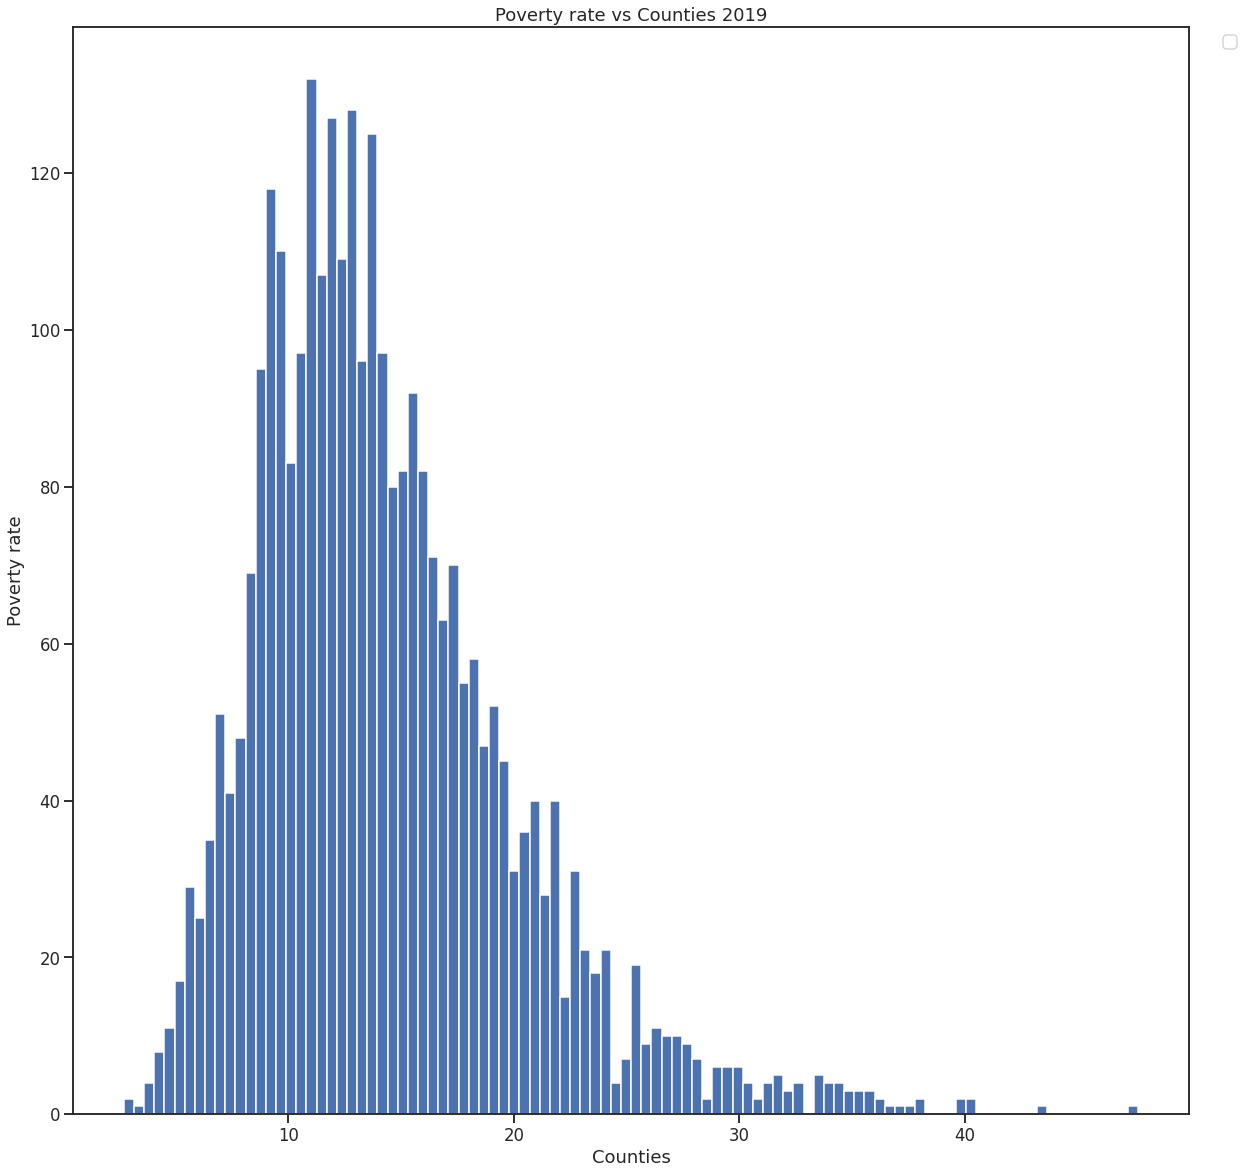

In [28]:
fig, ax = plt.subplots(figsize=(20,20))

plt.title('Poverty rate vs Counties 2019')
plt.xlabel('Counties')
plt.ylabel('Poverty rate')
ax.hist(pov_rate_2019['Poverty Percent, All Ages'], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [29]:
display(pov_rate_2019.sort_values(by='Poverty Percent, All Ages').head(10))
display(pov_rate_2019.sort_values(by='Poverty Percent, All Ages', ascending=False).head(10))

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
233,035,CO,Douglas County,2.7
2775,107,VA,Loudoun County,3.1
1713,028,NM,Los Alamos County,3.5
2305,083,SD,Lincoln County,3.8
1686,019,NJ,Hunterdon County,4.0
611,093,IL,Kendall County,4.0
2694,029,UT,Morgan County,4.0
222,014,CO,Broomfield County,4.1
695,057,IN,Hamilton County,4.2
1288,139,MN,Scott County,4.2


,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
2330,137,SD,Ziebach County,47.700001
2324,121,SD,Todd County,43.400002
2279,031,SD,Corson County,40.299999
2315,102,SD,Oglala Lakota County,40.099998
228,025,CO,Crowley County,40.000000
2272,017,SD,Buffalo County,39.799999
1319,027,MS,Coahoma County,38.200001
1373,135,MS,Tallahatchie County,37.900002
1316,021,MS,Claiborne County,37.500000
1332,053,MS,Humphreys County,37.099998


* Puerto Rico is not found and that is because poverty county data for Puerto Rico is in a separate set
* Need to add Puerto Rico
* But poverty ranking appear to be same from 2017-2019

In [30]:
annual_aqi_by_county_2019 = pd.read_csv('../../data/raw/annual_aqi_by_county_2019.csv')

# Clean education and vehicle 2017 dataset

In [31]:
educ_vehicle_2017.shape
educ_vehicle_2017.columns

educ_vehicle_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        837 non-null    int64  
 1   NAME              837 non-null    object 
 2   state             837 non-null    int64  
 3   county            837 non-null    int64  
 4   POP               837 non-null    int64  
 5   EDU_TOT           826 non-null    float64
 6   LESS_HS_TOT       826 non-null    float64
 7   HS_TOT            826 non-null    float64
 8   COL_OR_ASSOC_TOT  826 non-null    float64
 9   BACH_TOT          826 non-null    float64
 10  GRAD_TOT          826 non-null    float64
 11  VEHICLE_TOT       837 non-null    int64  
 12  WALK_TOT          226 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 85.1+ KB


* Have 837 rows and 12 columns
* Category types are appropriate for numerical and nominal columns

In [32]:
# educ_vehicle_2017.drop('Unnamed: 0', axis=1, inplace=True)
educ_vehicle_2017['WALK_TOT'].unique()
educ_vehicle_2017['WALK_TOT'].isnull().sum()

#drop walk b/c too many missing values and only retain counties and drop also drop that row index column
educ_vehicle_2017.state.unique()
cols_to_remove = ['Unnamed: 0', 'WALK_TOT']
educ_vehicle_2017 = remove_col(educ_vehicle_2017, cols_to_remove)

* drop first column as it is just an index column
* drop total walk column as majority of data is missing
* nb there is no fips state code for 4

In [33]:
educ_vehicle_2017.NAME.duplicated().sum()
educ_vehicle_2017.isnull().sum()
educ_vehicle_2017.loc[educ_vehicle_2017.isnull().any(axis=1)]
educ_vehicle_2017.loc[educ_vehicle_2017.NAME.str.contains('Puerto')]

,NAME,state,county,POP,EDU_TOT,LESS_HS_TOT,HS_TOT,COL_OR_ASSOC_TOT,BACH_TOT,GRAD_TOT,VEHICLE_TOT
352,"Arecibo Municipio, Puerto Rico",72,13,86066,NaN,NaN,NaN,NaN,NaN,NaN,21075
353,"Bayamón Municipio, Puerto Rico",72,21,179565,NaN,NaN,NaN,NaN,NaN,NaN,46000
354,"Caguas Municipio, Puerto Rico",72,25,129604,NaN,NaN,NaN,NaN,NaN,NaN,36045
355,"Carolina Municipio, Puerto Rico",72,31,154489,NaN,NaN,NaN,NaN,NaN,NaN,52510
356,"Guaynabo Municipio, Puerto Rico",72,61,87328,NaN,NaN,NaN,NaN,NaN,NaN,25965
357,"Mayagüez Municipio, Puerto Rico",72,97,75525,NaN,NaN,NaN,NaN,NaN,NaN,15815
358,"Ponce Municipio, Puerto Rico",72,113,140859,NaN,NaN,NaN,NaN,NaN,NaN,32020
359,"San Juan Municipio, Puerto Rico",72,127,337288,NaN,NaN,NaN,NaN,NaN,NaN,95110
360,"Toa Alta Municipio, Puerto Rico",72,135,73217,NaN,NaN,NaN,NaN,NaN,NaN,21330
361,"Toa Baja Municipio, Puerto Rico",72,137,78092,NaN,NaN,NaN,NaN,NaN,NaN,24670


* All Missing values are Puerto Rico counties similar to previous data sets
* Census Bureau keeps Puerto Rico as separate data column for education
* No duplicated data shown

In [34]:
edu_vehicle_estimates = educ_vehicle_2017.columns.values[4:]
# educ_vehicle_2017

for est in edu_vehicle_estimates:
    educ_vehicle_2017[est + '_ratio'] = educ_vehicle_2017[est] / educ_vehicle_2017['POP'] * 100
    educ_vehicle_2017.drop(est, axis=1, inplace=True)

# convert into ratios
display(educ_vehicle_2017)

,NAME,state,county,POP,EDU_TOT_ratio,LESS_HS_TOT_ratio,HS_TOT_ratio,COL_OR_ASSOC_TOT_ratio,BACH_TOT_ratio,GRAD_TOT_ratio,VEHICLE_TOT_ratio
0,"St. Lawrence County, New York",36,89,109623,66.185928,8.359560,23.588116,18.327358,7.552247,8.358647,32.766846
1,"Saratoga County, New York",36,91,229869,71.525086,4.635684,16.980541,19.820419,16.481561,13.606880,45.984887
2,"Schenectady County, New York",36,93,155565,69.072735,6.482821,20.662745,22.667695,11.062900,8.196574,38.755504
3,"Steuben County, New York",36,101,96281,70.638028,6.761459,26.921199,21.483990,7.738806,7.732574,36.959525
4,"Suffolk County, New York",36,103,1492953,69.456038,6.873693,18.559191,18.702062,13.936407,11.384685,41.375382
...,...,...,...,...,...,...,...,...,...,...,...
832,"Putnam County, New York",36,79,99323,71.933993,5.124694,20.737392,18.218338,15.030758,12.822810,42.683970
833,"Queens County, New York",36,81,2358582,71.878018,12.930820,20.936054,15.809711,14.245424,7.956009,16.619308
834,"Rensselaer County, New York",36,83,159722,69.525175,5.694269,19.865767,21.884274,12.611287,9.469578,41.146492
835,"Richmond County, New York",36,85,479458,69.678470,8.140650,21.009139,17.452832,13.788069,9.287779,26.693683


* convert all estimates of education and vehicles of a county to a ratio of estimated total / population of county
* retrieve ratio estimate to county population


No handles with labels found to put in legend.


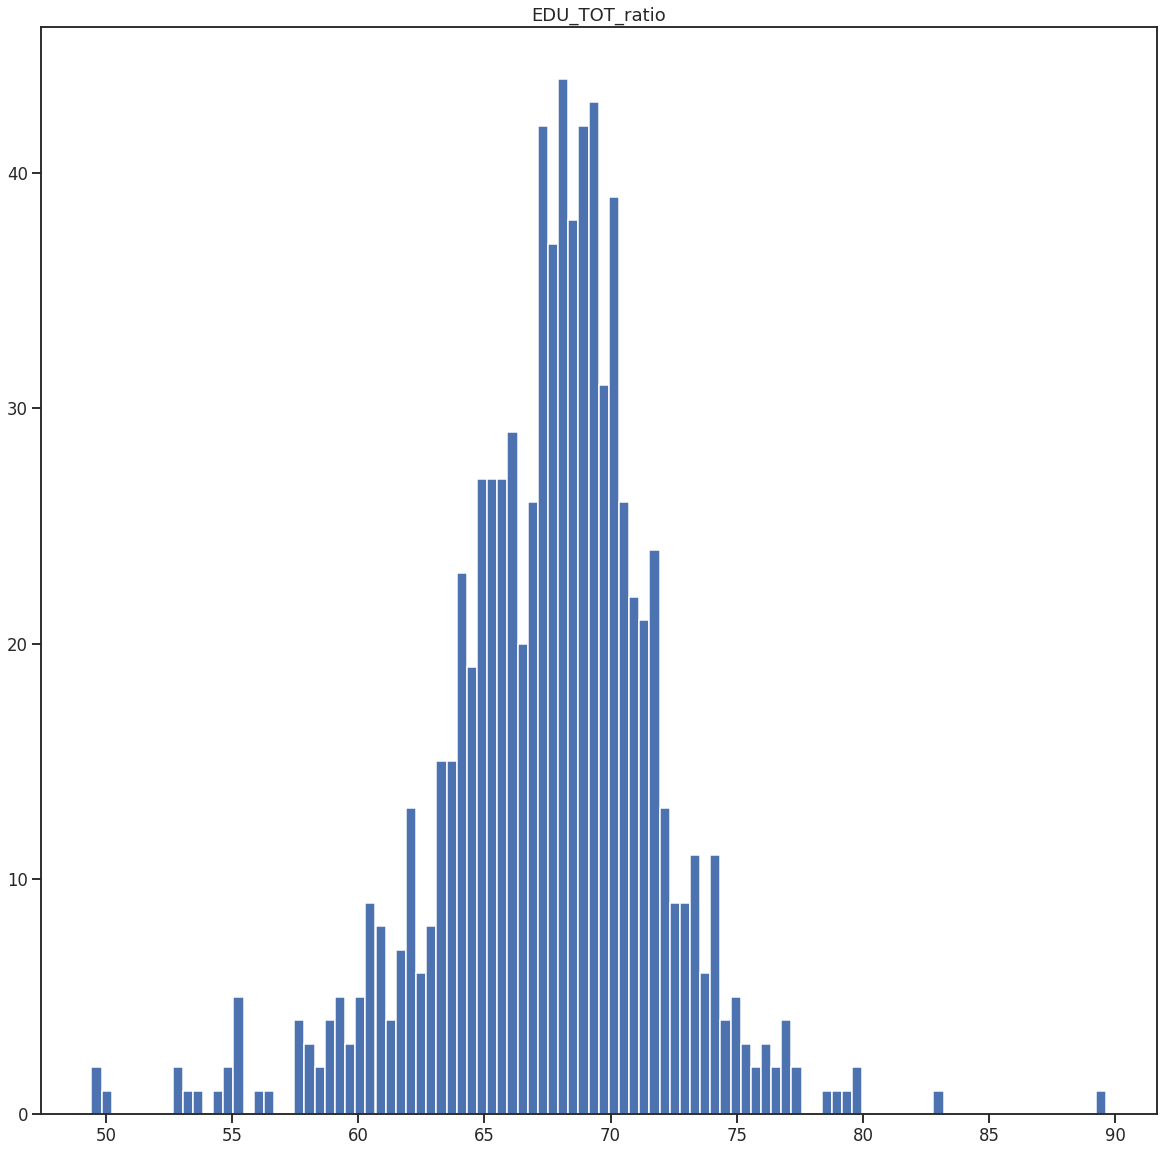

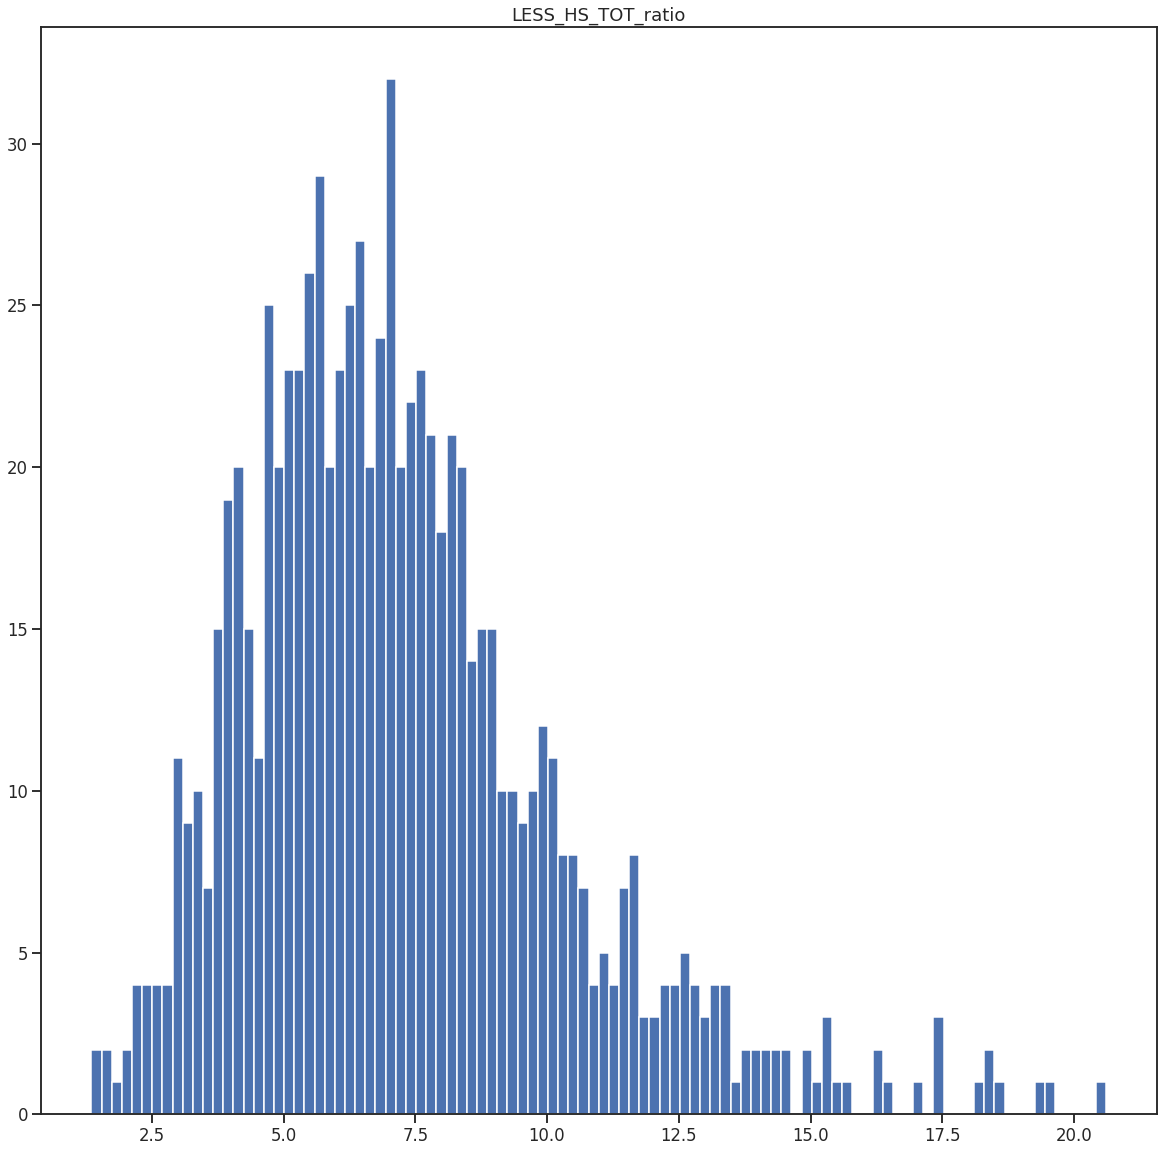

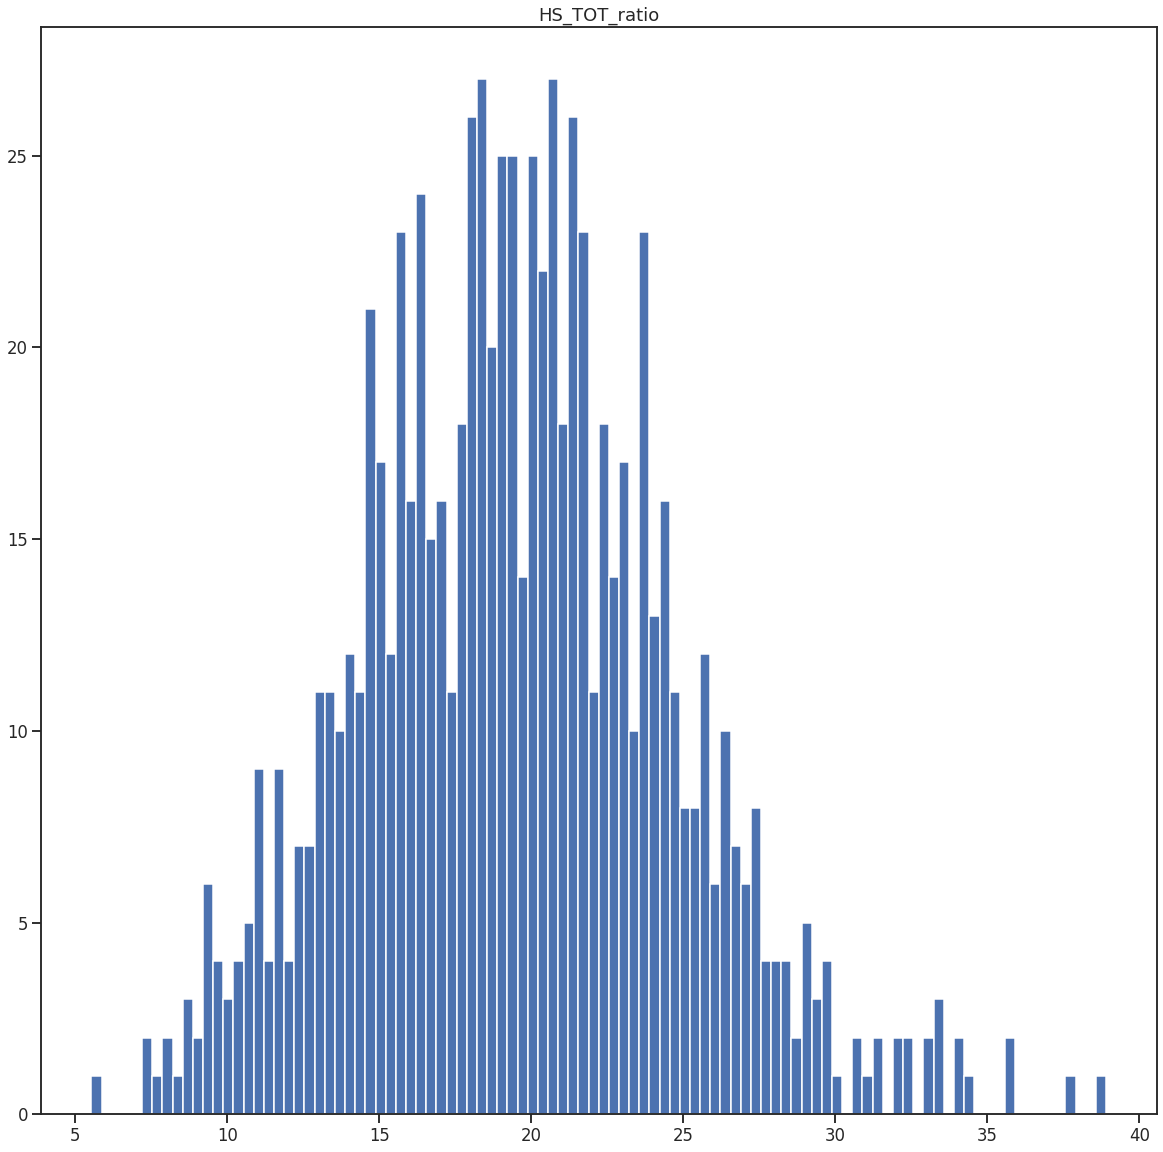

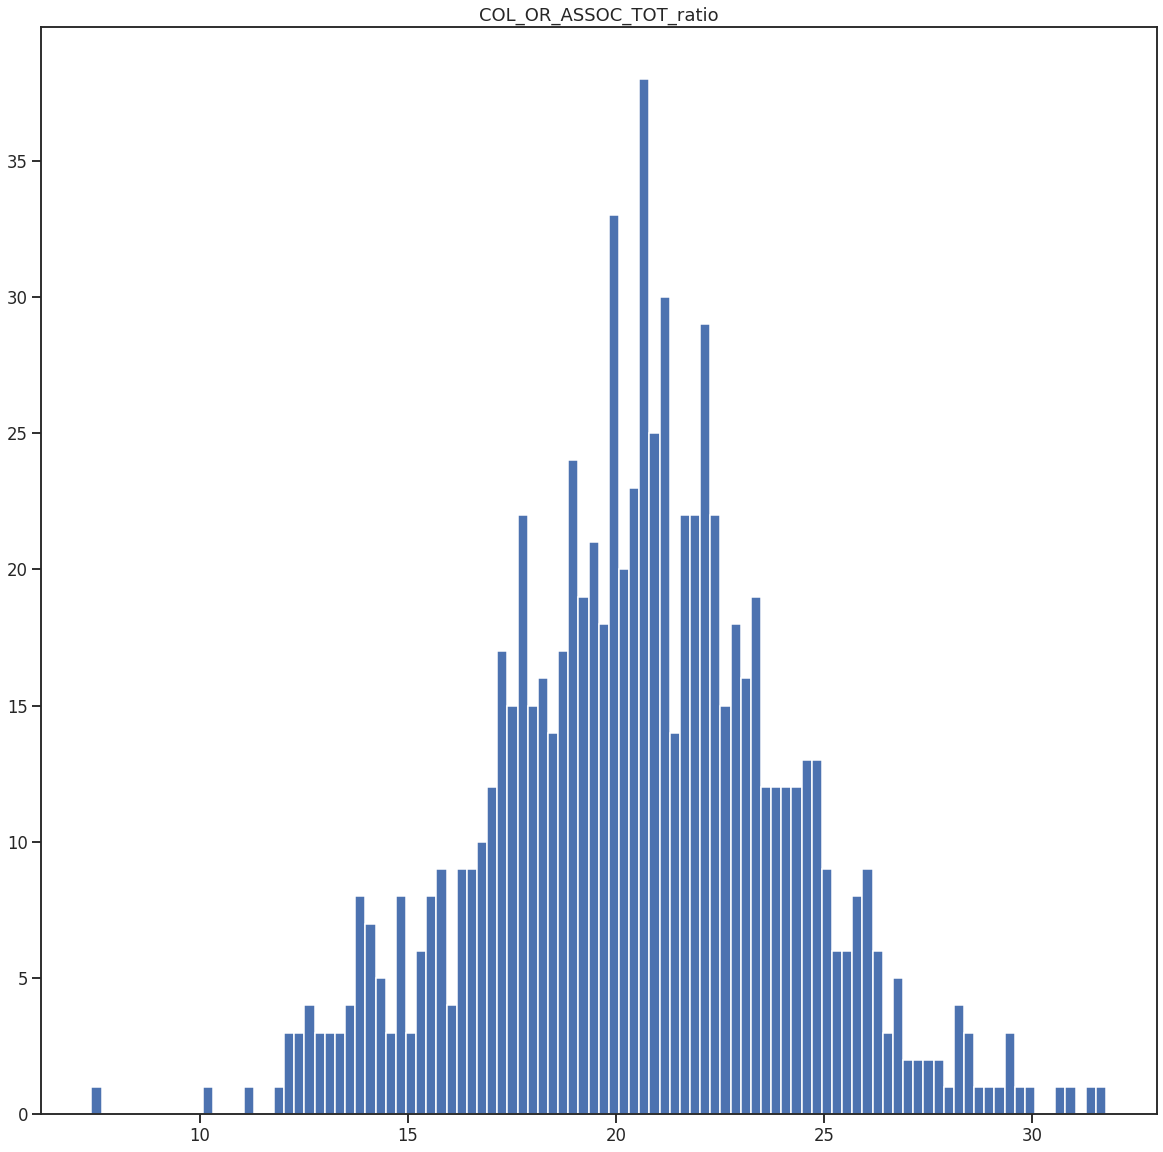

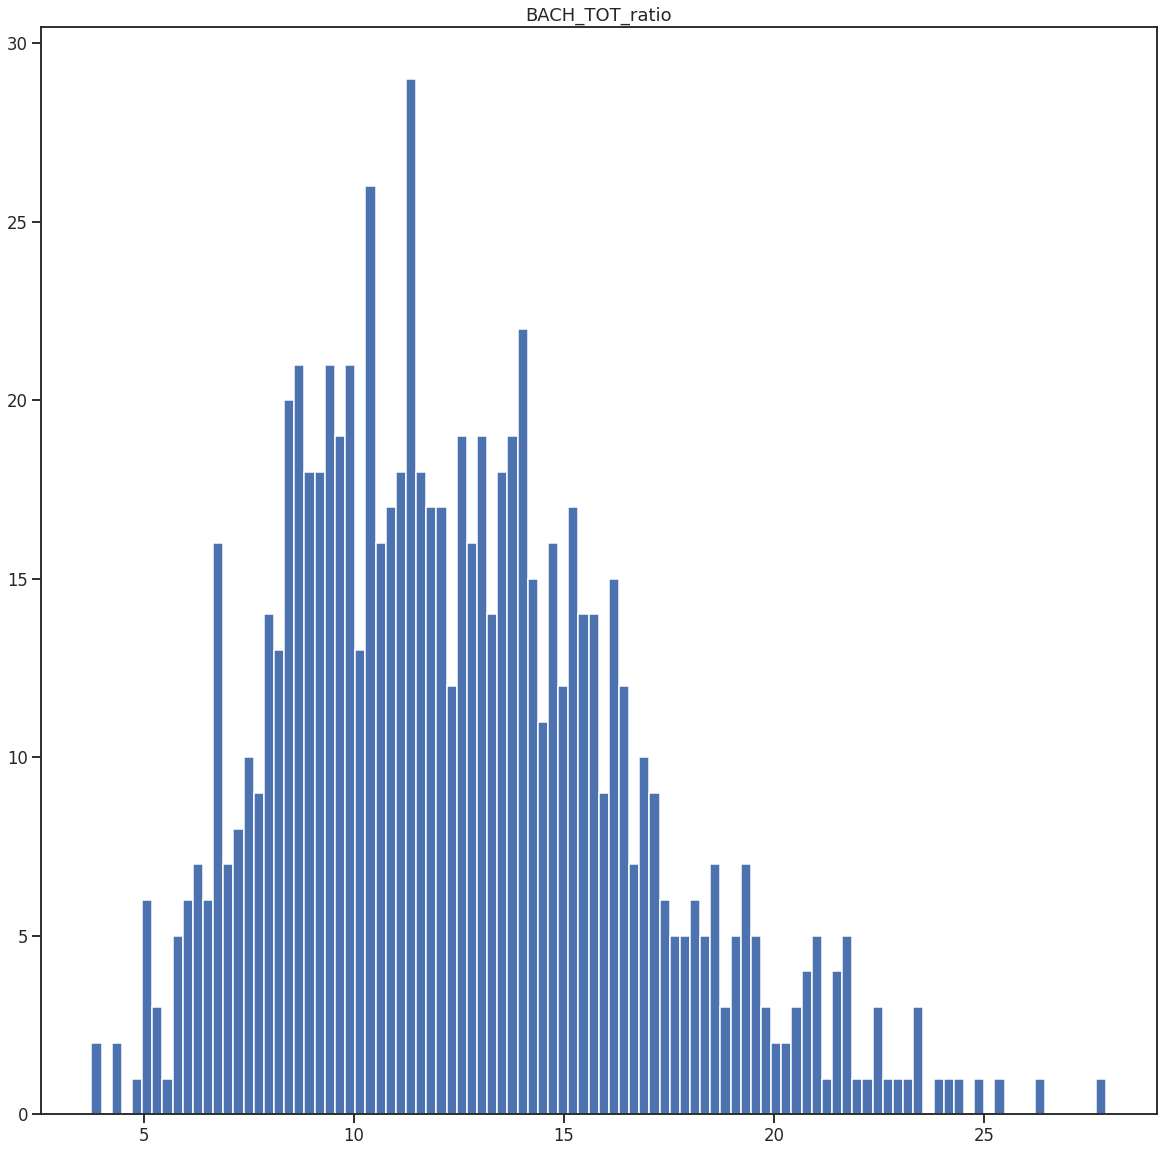

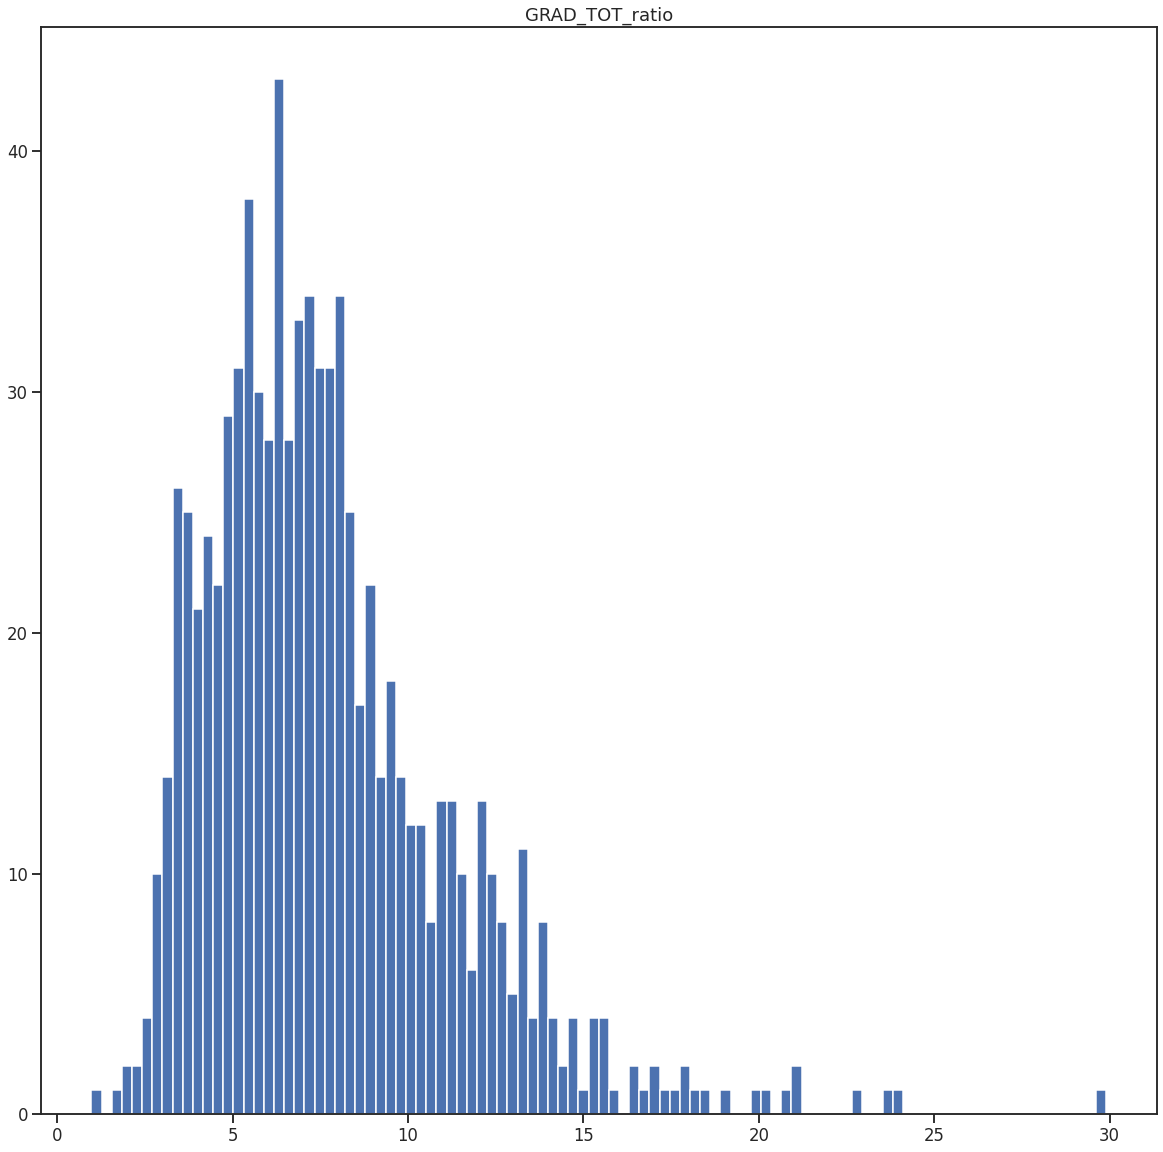

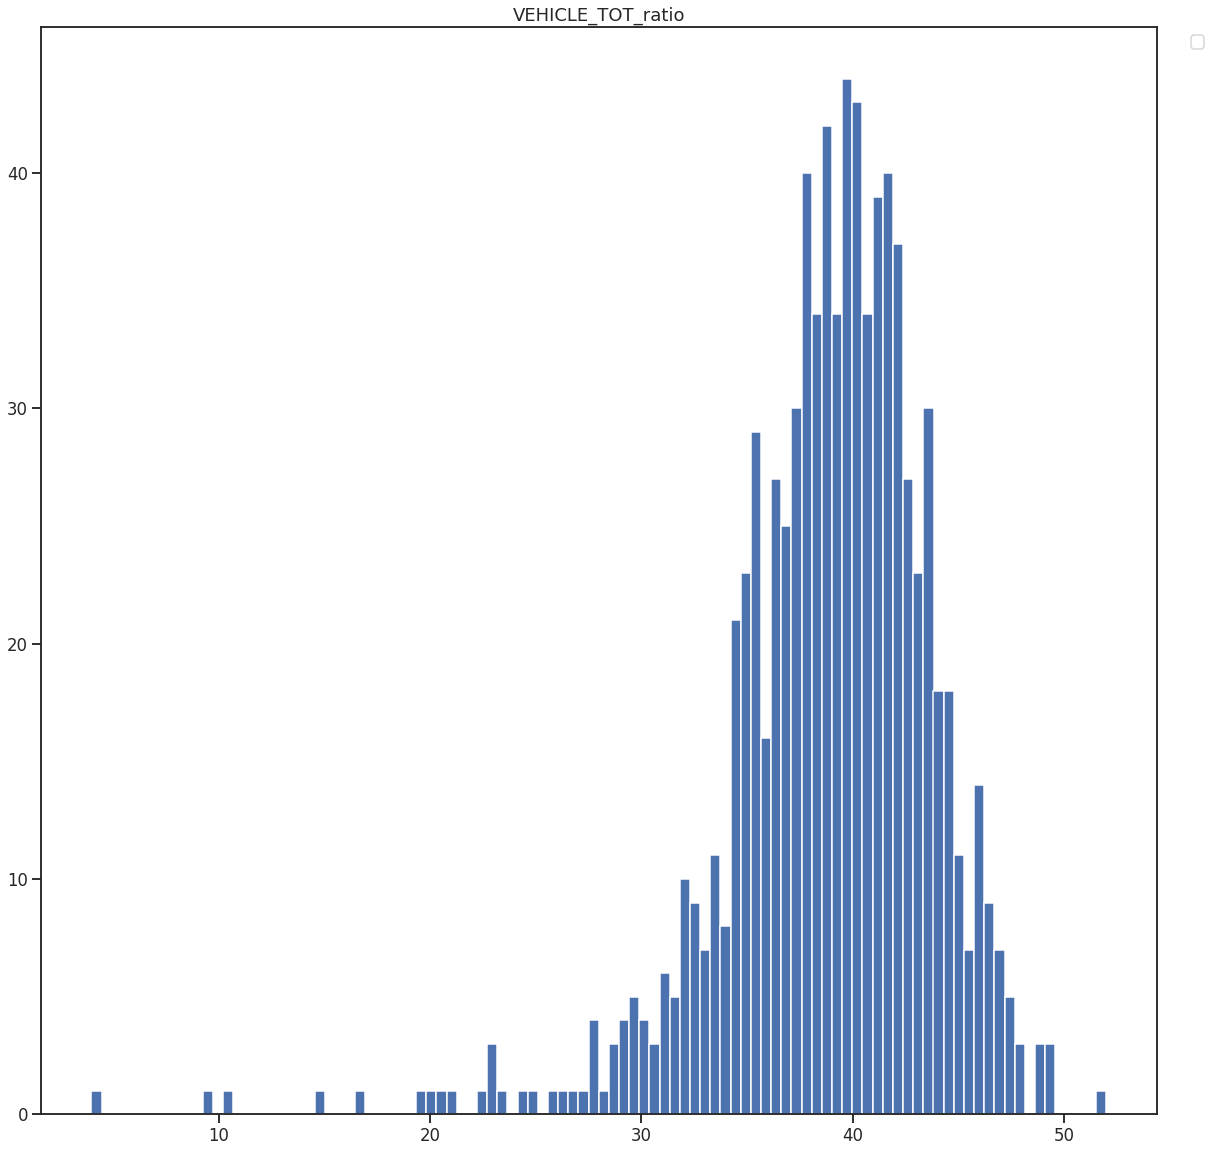

In [35]:
edu_veh_ratio = educ_vehicle_2017.columns.values[4:]
edu_veh_ratio
for ratio in edu_veh_ratio:
    fig, ax = plt.subplots(figsize=(20,20))

    plt.title(ratio)
    ax.hist(educ_vehicle_2017[ratio], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

* No negative values
* distributions appear plausible; few outliers in graduates and less than high school educations

# Repeat Steps for education and vehicle 2018 data

In [36]:
educ_vehicle_2018.shape
educ_vehicle_2018.columns

educ_vehicle_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        838 non-null    int64  
 1   NAME              838 non-null    object 
 2   state             838 non-null    int64  
 3   county            838 non-null    int64  
 4   POP               838 non-null    int64  
 5   EDU_TOT           826 non-null    float64
 6   LESS_HS_TOT       826 non-null    float64
 7   HS_TOT            826 non-null    float64
 8   COL_OR_ASSOC_TOT  826 non-null    float64
 9   BACH_TOT          826 non-null    float64
 10  GRAD_TOT          826 non-null    float64
 11  VEHICLE_TOT       838 non-null    int64  
 12  WALK_TOT          231 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 85.2+ KB


* Have 837 rows and 12 columns
* Category types are appropriate for numerical and nominal columns

In [37]:
educ_vehicle_2018['WALK_TOT'].unique()
educ_vehicle_2018['WALK_TOT'].isnull().sum()

educ_vehicle_2018.state.unique()
cols_to_remove = ['Unnamed: 0', 'WALK_TOT']
educ_vehicle_2018 = remove_col(educ_vehicle_2018, cols_to_remove)

* drop first column as it is just an index column
* drop total walk column as majority of data is missing
* nb there is no fips state code for 4

In [38]:
educ_vehicle_2018.NAME.duplicated().sum()
educ_vehicle_2018.isnull().sum()
educ_vehicle_2018.loc[educ_vehicle_2018.isnull().any(axis=1)]

,NAME,state,county,POP,EDU_TOT,LESS_HS_TOT,HS_TOT,COL_OR_ASSOC_TOT,BACH_TOT,GRAD_TOT,VEHICLE_TOT
376,"Jones County, Mississippi",28,67,68461,NaN,NaN,NaN,NaN,NaN,NaN,26755
827,"Arecibo Municipio, Puerto Rico",72,13,82114,NaN,NaN,NaN,NaN,NaN,NaN,21210
828,"Bayamón Municipio, Puerto Rico",72,21,170480,NaN,NaN,NaN,NaN,NaN,NaN,48105
829,"Caguas Municipio, Puerto Rico",72,25,124434,NaN,NaN,NaN,NaN,NaN,NaN,37810
830,"Carolina Municipio, Puerto Rico",72,31,147661,NaN,NaN,NaN,NaN,NaN,NaN,47205
831,"Guaynabo Municipio, Puerto Rico",72,61,83787,NaN,NaN,NaN,NaN,NaN,NaN,27890
832,"Mayagüez Municipio, Puerto Rico",72,97,71986,NaN,NaN,NaN,NaN,NaN,NaN,14200
833,"Ponce Municipio, Puerto Rico",72,113,133191,NaN,NaN,NaN,NaN,NaN,NaN,32475
834,"San Juan Municipio, Puerto Rico",72,127,320967,NaN,NaN,NaN,NaN,NaN,NaN,94245
835,"Toa Alta Municipio, Puerto Rico",72,135,71094,NaN,NaN,NaN,NaN,NaN,NaN,24755


* All Missing values are Puerto Rico counties similar to previous data sets
* Census Bureau keeps Puerto Rico as separate data column for education
* No duplicated data shown

In [39]:
edu_vehicle_estimates = educ_vehicle_2018.columns.values[4:]
# educ_vehicle_2017

for est in edu_vehicle_estimates:
    educ_vehicle_2018[est + '_ratio'] = educ_vehicle_2018[est] / educ_vehicle_2018['POP'] * 100
    educ_vehicle_2018.drop(est, axis=1, inplace=True)

# convert into ratios
display(educ_vehicle_2018)

,NAME,state,county,POP,EDU_TOT_ratio,LESS_HS_TOT_ratio,HS_TOT_ratio,COL_OR_ASSOC_TOT_ratio,BACH_TOT_ratio,GRAD_TOT_ratio,VEHICLE_TOT_ratio
0,"Baldwin County, Alabama",1,3,218022,71.410683,7.009384,20.187412,21.820275,14.773738,7.619873,40.245938
1,"Calhoun County, Alabama",1,15,114277,69.280783,10.606684,22.542594,23.660929,6.925278,5.545298,37.417853
2,"Cullman County, Alabama",1,43,83442,69.891661,12.257616,21.750437,27.423839,5.891517,2.568251,39.626327
3,"DeKalb County, Alabama",1,49,71385,67.477761,16.363382,20.078448,21.005814,5.506759,4.523359,36.632346
4,"Elmore County, Alabama",1,51,81887,69.355331,9.146751,22.539597,20.155824,12.390245,5.122913,38.589764
...,...,...,...,...,...,...,...,...,...,...,...
833,"Ponce Municipio, Puerto Rico",72,113,133191,NaN,NaN,NaN,NaN,NaN,NaN,24.382278
834,"San Juan Municipio, Puerto Rico",72,127,320967,NaN,NaN,NaN,NaN,NaN,NaN,29.362832
835,"Toa Alta Municipio, Puerto Rico",72,135,71094,NaN,NaN,NaN,NaN,NaN,NaN,34.820097
836,"Toa Baja Municipio, Puerto Rico",72,137,74623,NaN,NaN,NaN,NaN,NaN,NaN,31.759645


* convert all estimates of education and vehicles of a county to a ratio of estimated total / population of county
* retrieve ratio estimate to county population


No handles with labels found to put in legend.


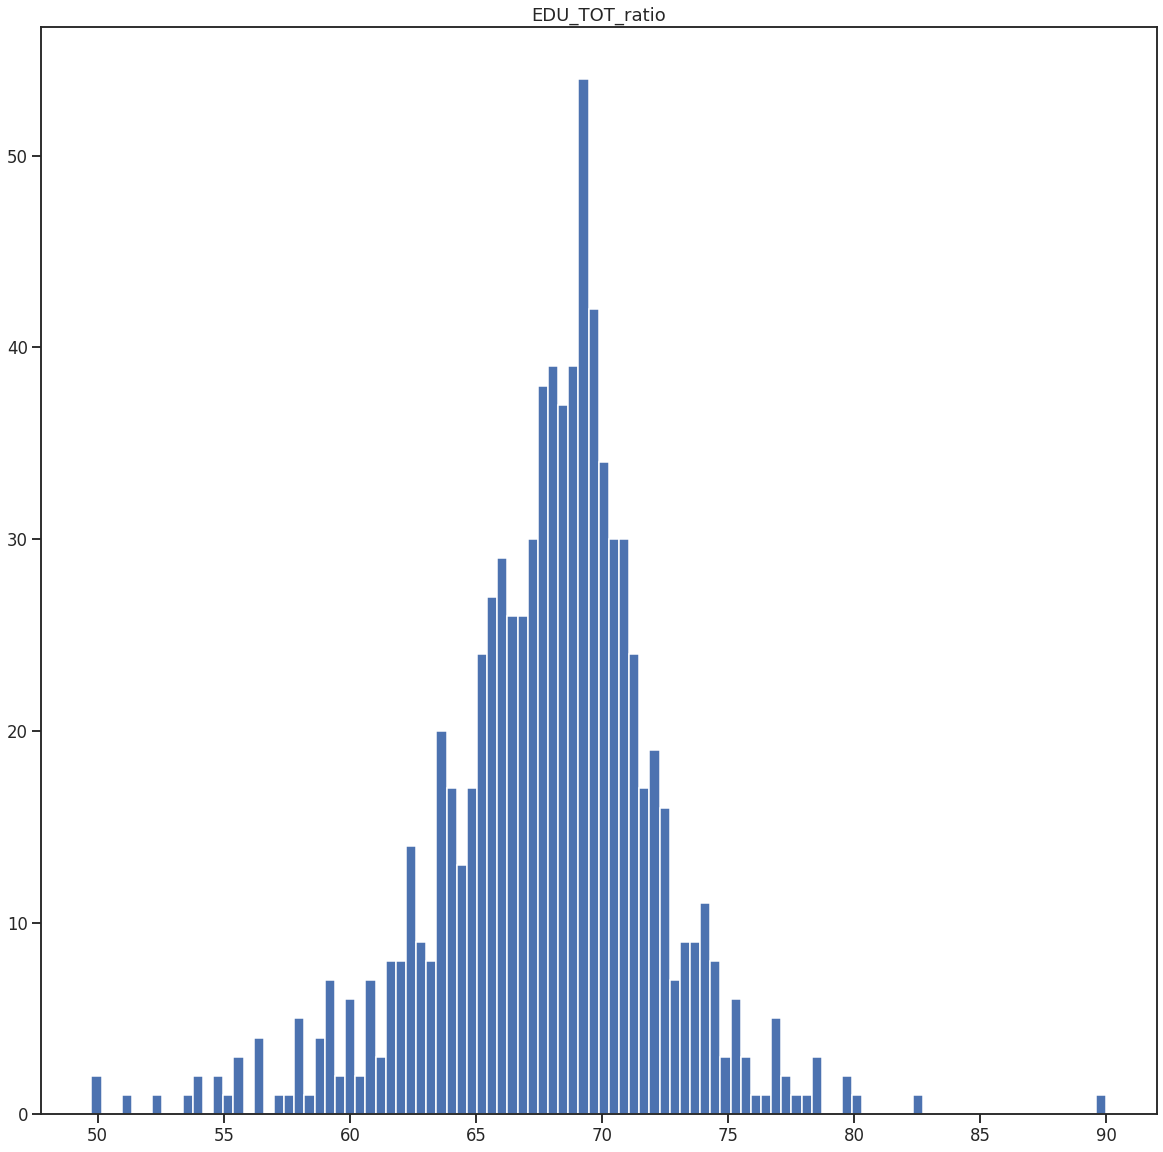

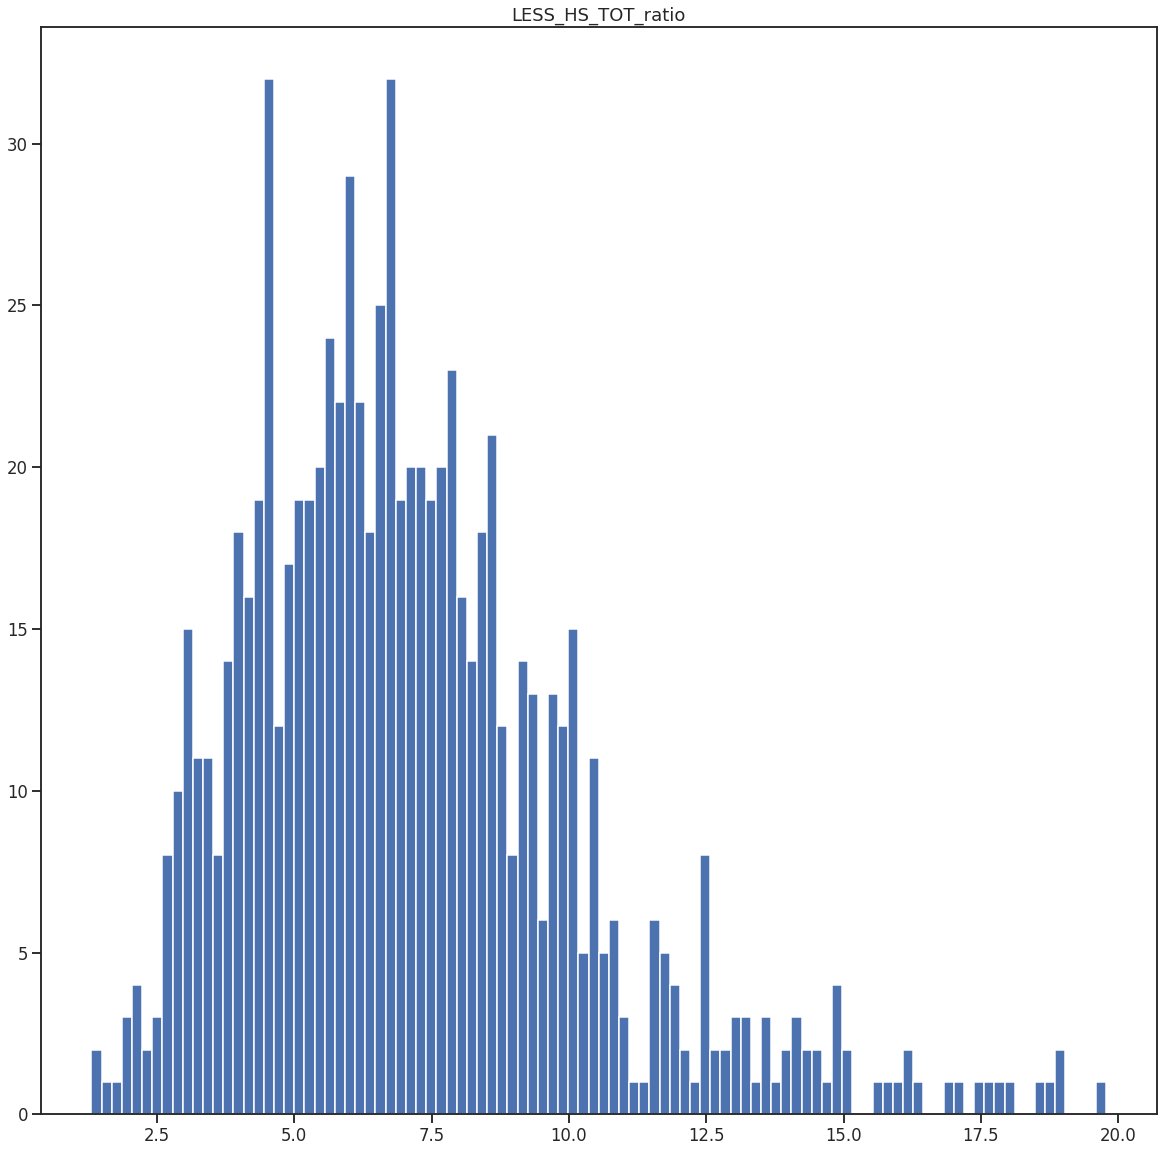

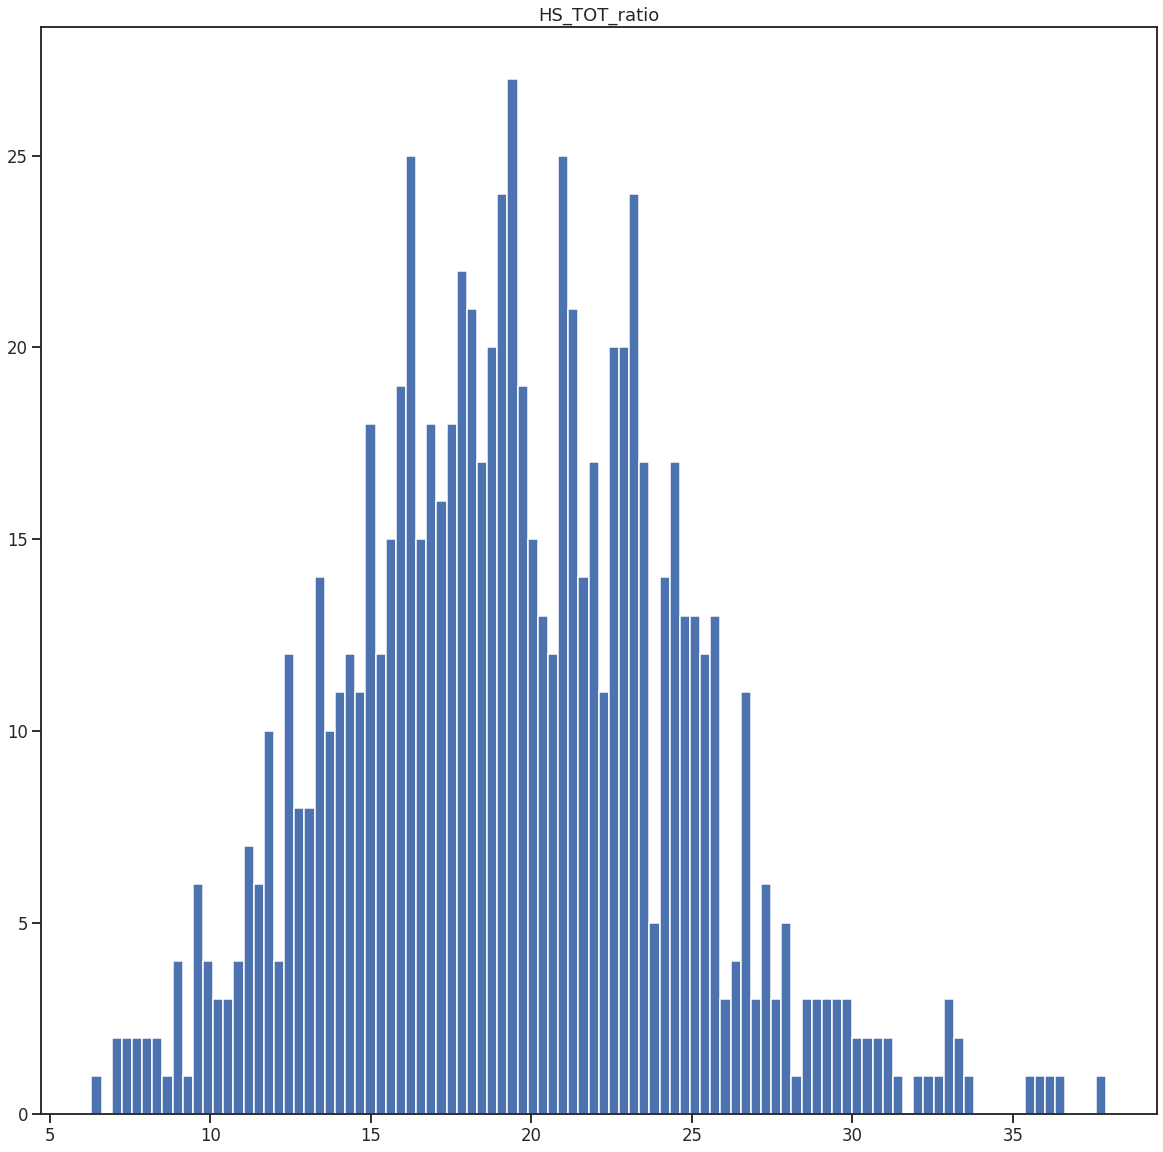

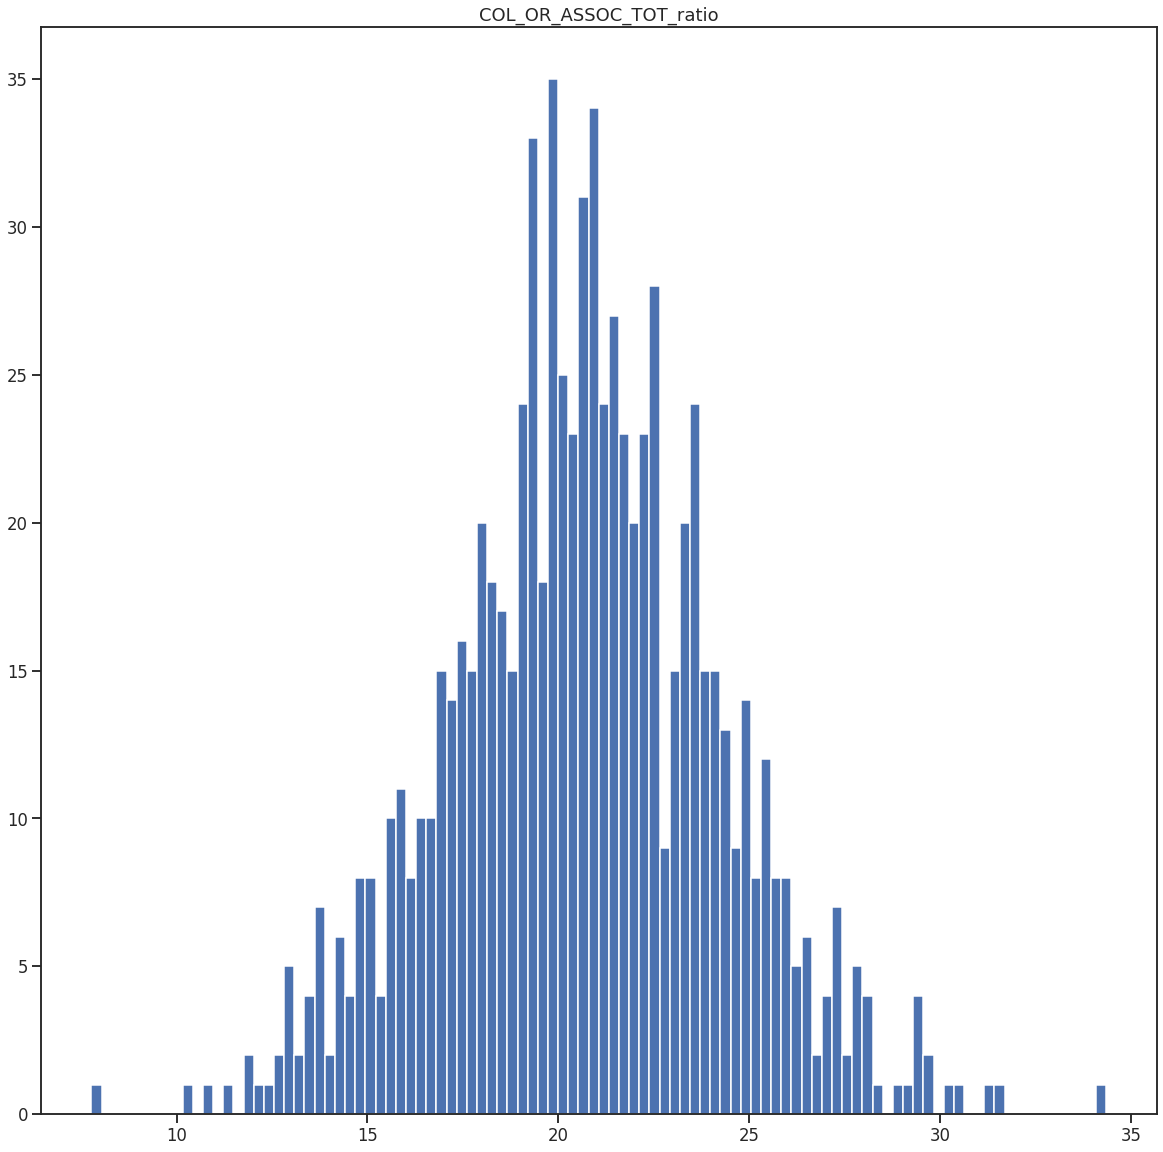

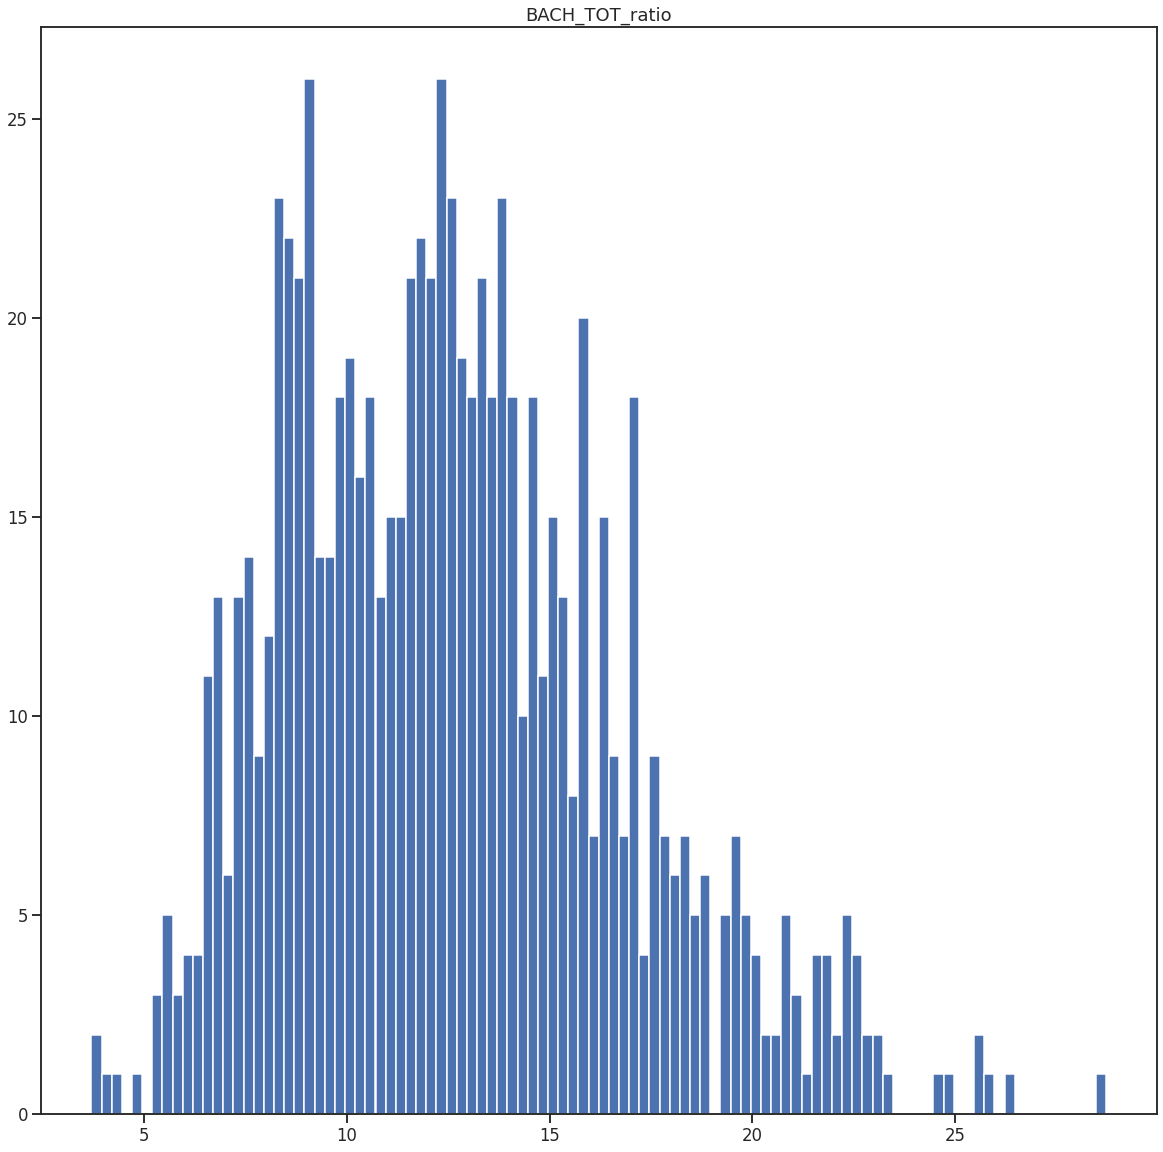

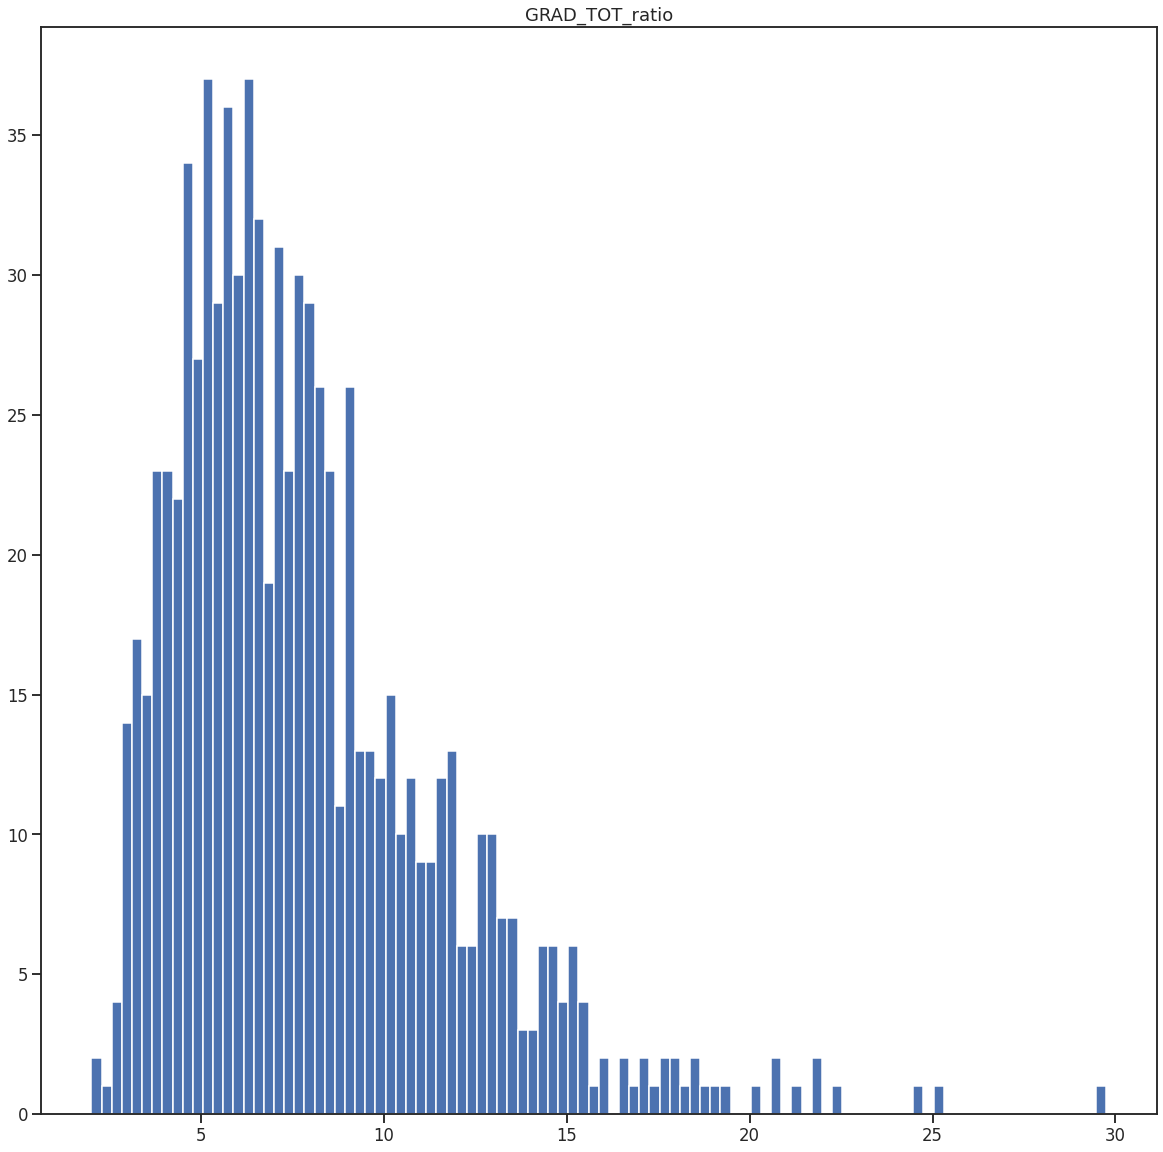

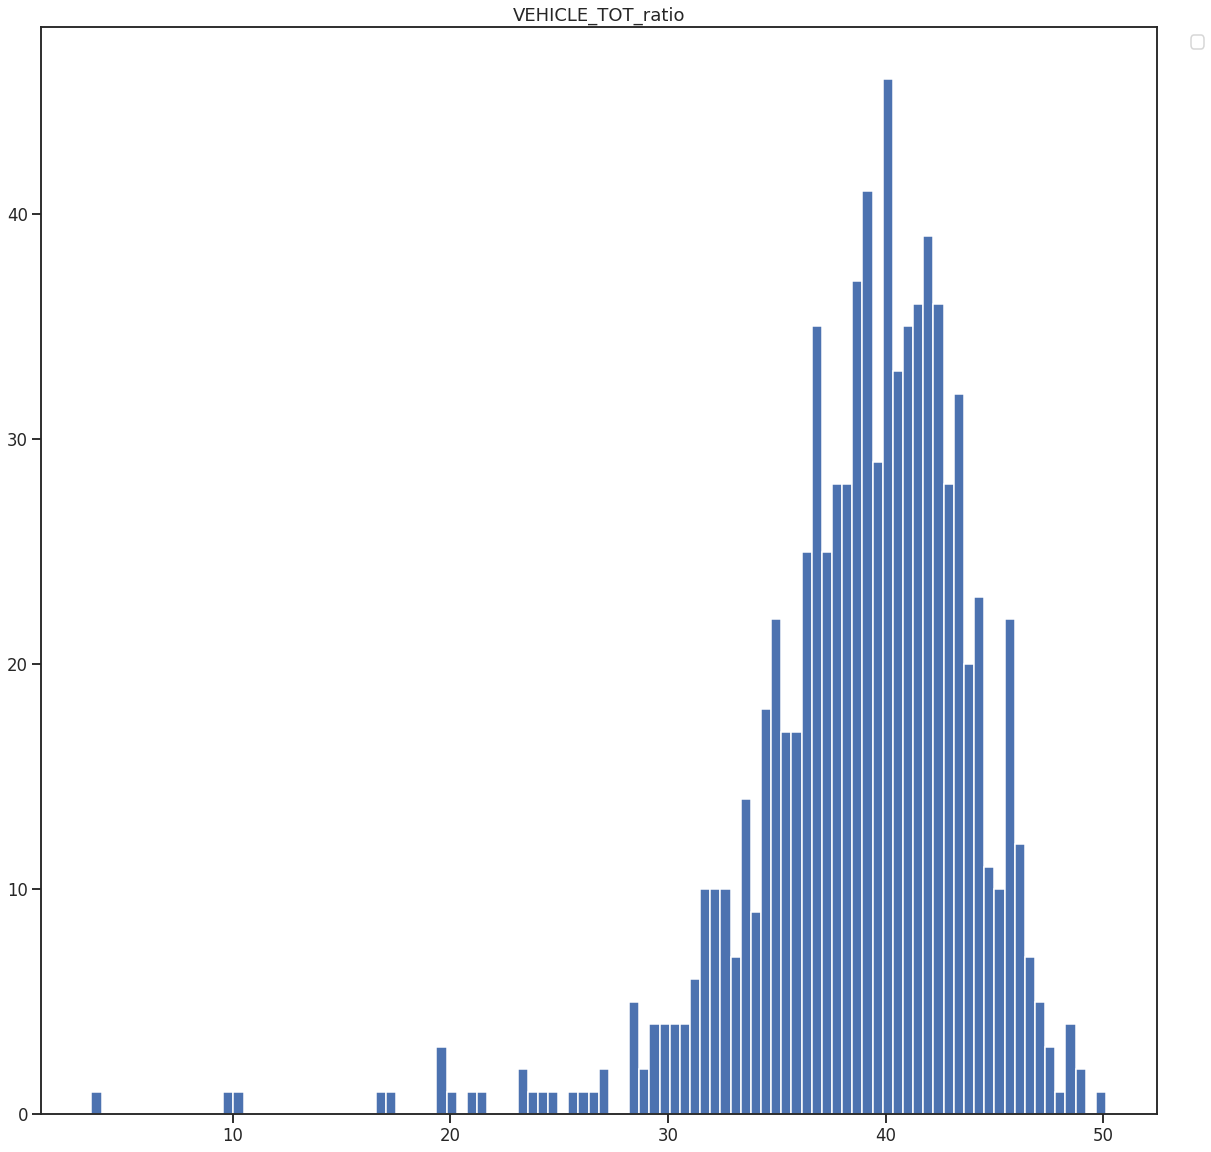

In [40]:
edu_veh_ratio = educ_vehicle_2018.columns.values[4:]
edu_veh_ratio
for ratio in edu_veh_ratio:
    fig, ax = plt.subplots(figsize=(20,20))

    plt.title(ratio)
    ax.hist(educ_vehicle_2018[ratio], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

* No negative values
* distributions appear plausible;
* few outliers in edu total graduates and less than high school educations

# Repeat Steps for education and vehicle 2019 data

In [41]:
educ_vehicle_2019.shape
educ_vehicle_2019.columns

educ_vehicle_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        840 non-null    int64  
 1   NAME              840 non-null    object 
 2   state             840 non-null    int64  
 3   county            840 non-null    int64  
 4   POP               840 non-null    int64  
 5   EDU_TOT           827 non-null    float64
 6   LESS_HS_TOT       827 non-null    float64
 7   HS_TOT            827 non-null    float64
 8   COL_OR_ASSOC_TOT  827 non-null    float64
 9   BACH_TOT          827 non-null    float64
 10  GRAD_TOT          827 non-null    float64
 11  VEHICLE_TOT       840 non-null    int64  
 12  WALK_TOT          226 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 85.4+ KB


* Have 837 rows and 12 columns
* Category types are appropriate for numerical and nominal columns

In [42]:
educ_vehicle_2019['WALK_TOT'].unique()
educ_vehicle_2019['WALK_TOT'].isnull().sum()

educ_vehicle_2019.state.unique()
cols_to_remove = ['Unnamed: 0', 'WALK_TOT']
educ_vehicle_2019 = remove_col(educ_vehicle_2019, cols_to_remove)

* drop first column as it is just an index column
* drop total walk column as majority of data is missing
* nb there is no fips state code for 4

In [43]:
educ_vehicle_2019.NAME.duplicated().sum()
educ_vehicle_2019.isnull().sum()
educ_vehicle_2019.loc[educ_vehicle_2019.isnull().any(axis=1)]

,NAME,state,county,POP,EDU_TOT,LESS_HS_TOT,HS_TOT,COL_OR_ASSOC_TOT,BACH_TOT,GRAD_TOT,VEHICLE_TOT
291,"St. Landry Parish, Louisiana",22,97,82124,NaN,NaN,NaN,NaN,NaN,NaN,27175
559,"Muskingum County, Ohio",39,119,86215,NaN,NaN,NaN,NaN,NaN,NaN,33710
829,"Arecibo Municipio, Puerto Rico",72,13,81966,NaN,NaN,NaN,NaN,NaN,NaN,20780
830,"Bayamón Municipio, Puerto Rico",72,21,169269,NaN,NaN,NaN,NaN,NaN,NaN,53730
831,"Caguas Municipio, Puerto Rico",72,25,124606,NaN,NaN,NaN,NaN,NaN,NaN,39305
832,"Carolina Municipio, Puerto Rico",72,31,146984,NaN,NaN,NaN,NaN,NaN,NaN,48385
833,"Guaynabo Municipio, Puerto Rico",72,61,83728,NaN,NaN,NaN,NaN,NaN,NaN,30465
834,"Mayagüez Municipio, Puerto Rico",72,97,71530,NaN,NaN,NaN,NaN,NaN,NaN,16695
835,"Ponce Municipio, Puerto Rico",72,113,131881,NaN,NaN,NaN,NaN,NaN,NaN,31635
836,"San Juan Municipio, Puerto Rico",72,127,318441,NaN,NaN,NaN,NaN,NaN,NaN,92055


* All Missing values are Puerto Rico counties similar to previous data sets
* Census Bureau keeps Puerto Rico as separate data column for education
* No duplicated data shown

In [44]:
edu_vehicle_estimates = educ_vehicle_2019.columns.values[4:]
# educ_vehicle_2017

for est in edu_vehicle_estimates:
    educ_vehicle_2019[est + '_ratio'] = educ_vehicle_2019[est] / educ_vehicle_2019['POP'] * 100
    educ_vehicle_2019.drop(est, axis=1, inplace=True)

# convert into ratios
display(educ_vehicle_2019)

,NAME,state,county,POP,EDU_TOT_ratio,LESS_HS_TOT_ratio,HS_TOT_ratio,COL_OR_ASSOC_TOT_ratio,BACH_TOT_ratio,GRAD_TOT_ratio,VEHICLE_TOT_ratio
0,"Baldwin County, Alabama",1,3,223234,71.546897,6.790184,18.762375,22.937366,14.684591,8.372381,38.152790
1,"Calhoun County, Alabama",1,15,113605,69.613133,10.734563,24.010387,21.438317,7.994366,5.435500,36.380441
2,"Cullman County, Alabama",1,43,83768,70.187900,13.148219,21.397192,24.610830,7.085044,3.946614,38.009741
3,"DeKalb County, Alabama",1,49,71513,65.732105,14.043600,25.003845,18.295974,5.164096,3.224589,39.244613
4,"Elmore County, Alabama",1,51,81209,70.870224,7.314460,24.617961,21.316603,11.597237,6.023963,40.642047
...,...,...,...,...,...,...,...,...,...,...,...
835,"Ponce Municipio, Puerto Rico",72,113,131881,NaN,NaN,NaN,NaN,NaN,NaN,23.987534
836,"San Juan Municipio, Puerto Rico",72,127,318441,NaN,NaN,NaN,NaN,NaN,NaN,28.908024
837,"Toa Alta Municipio, Puerto Rico",72,135,72025,NaN,NaN,NaN,NaN,NaN,NaN,33.641097
838,"Toa Baja Municipio, Puerto Rico",72,137,74271,NaN,NaN,NaN,NaN,NaN,NaN,30.833030


* convert all estimates of education and vehicles of a county to a ratio of estimated total / population of county
* retrieve ratio estimate to county population


No handles with labels found to put in legend.


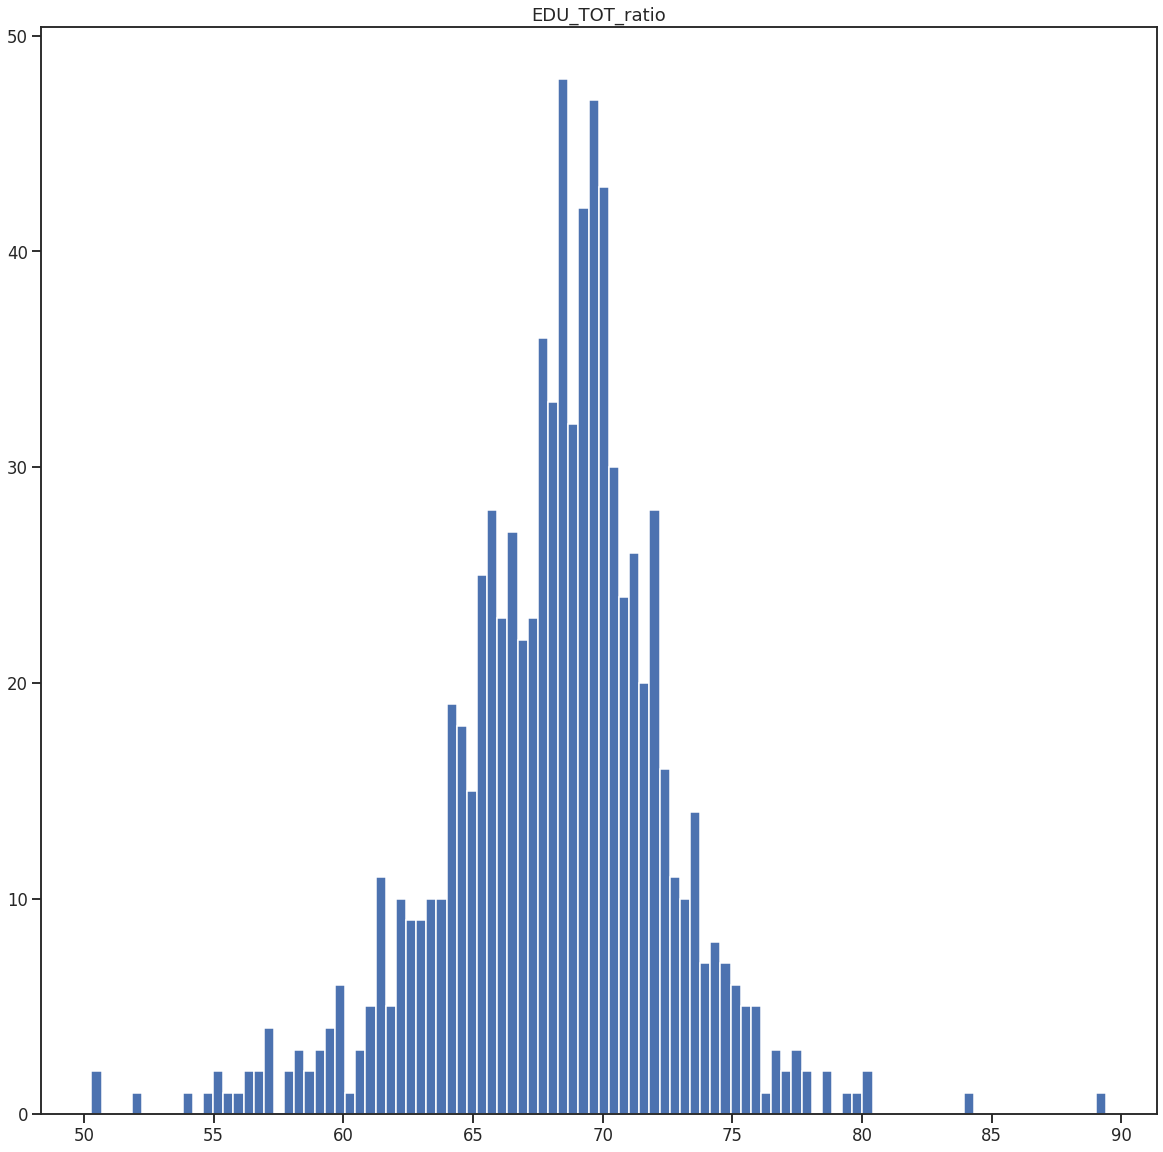

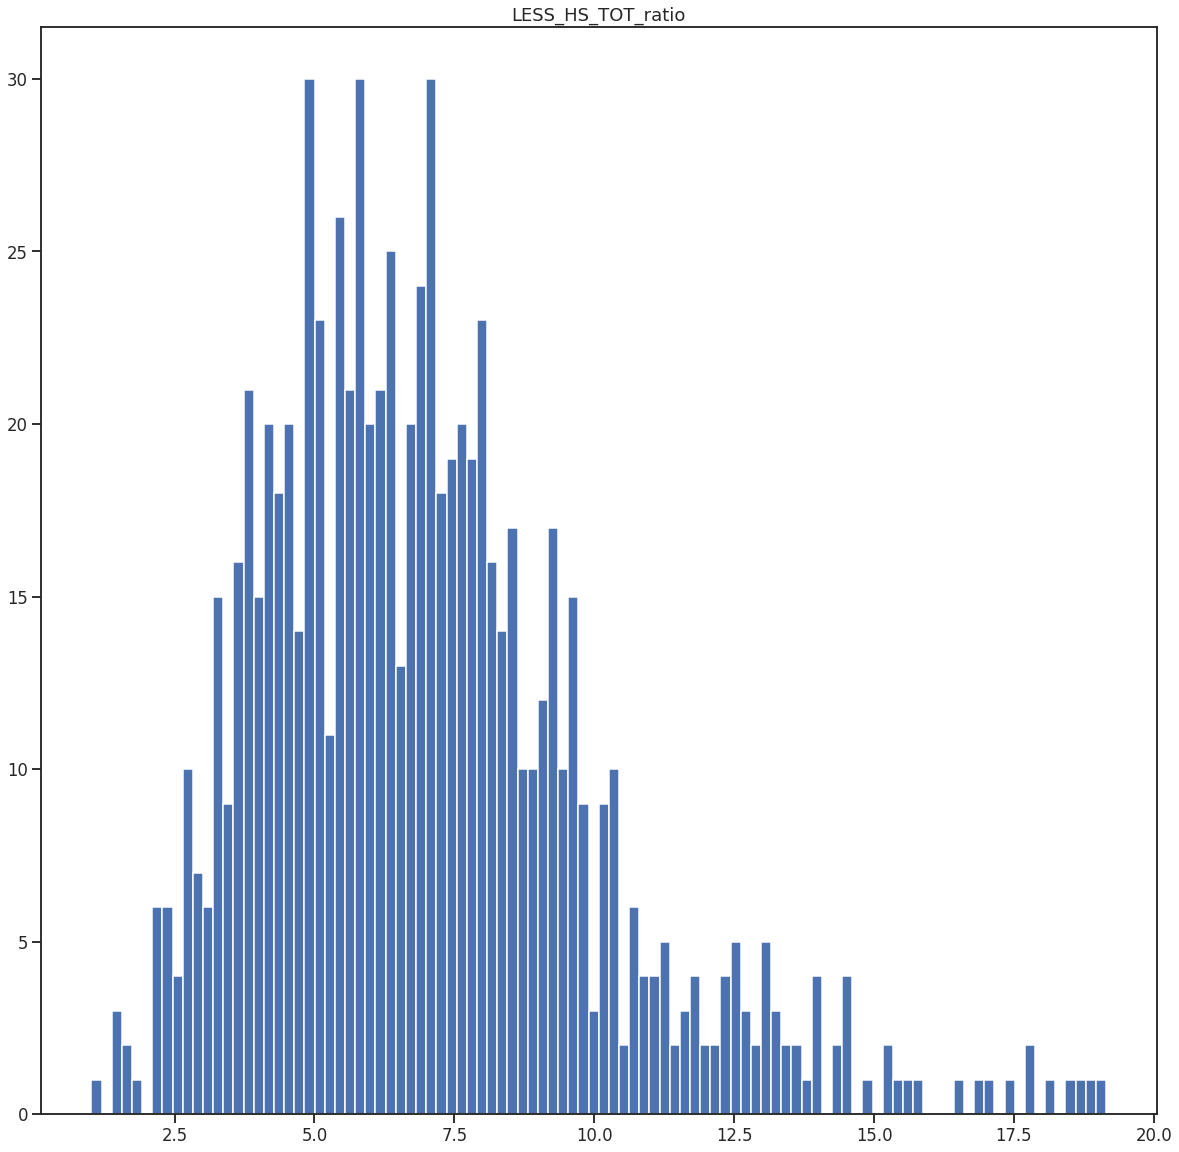

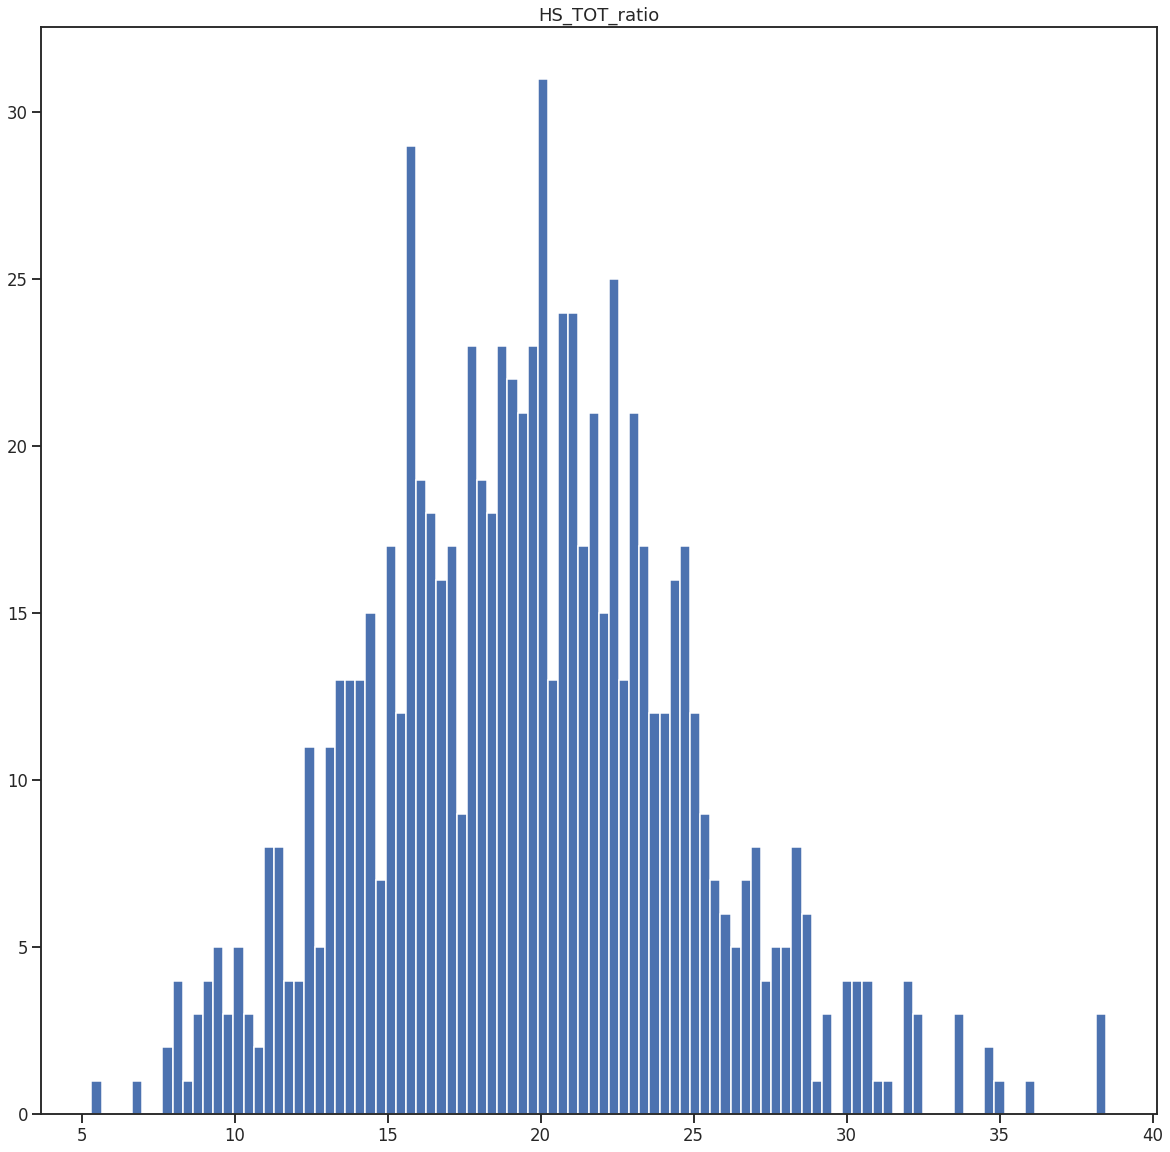

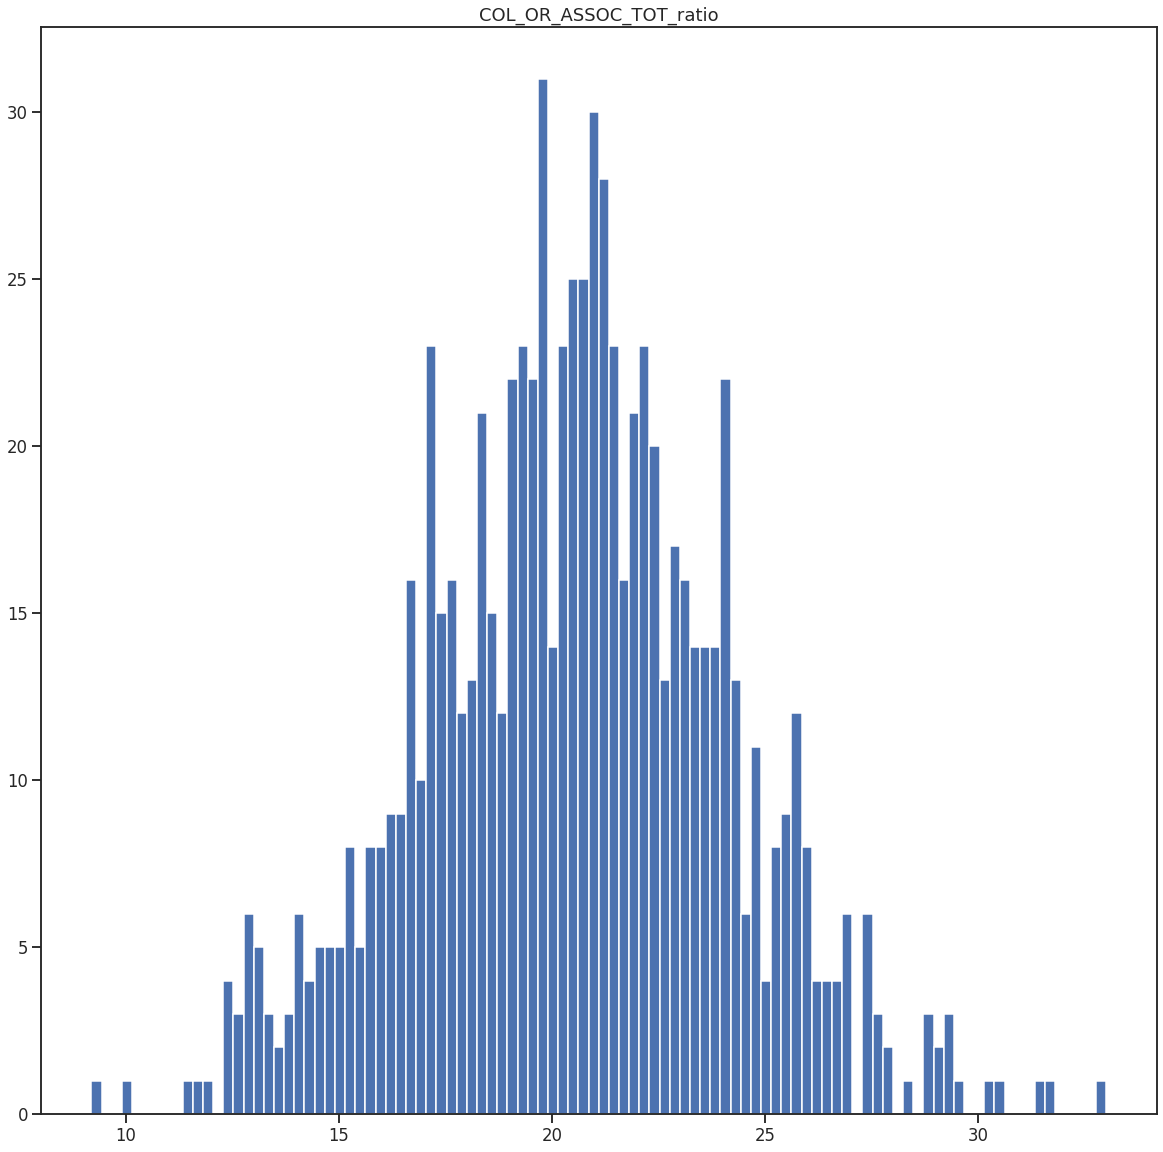

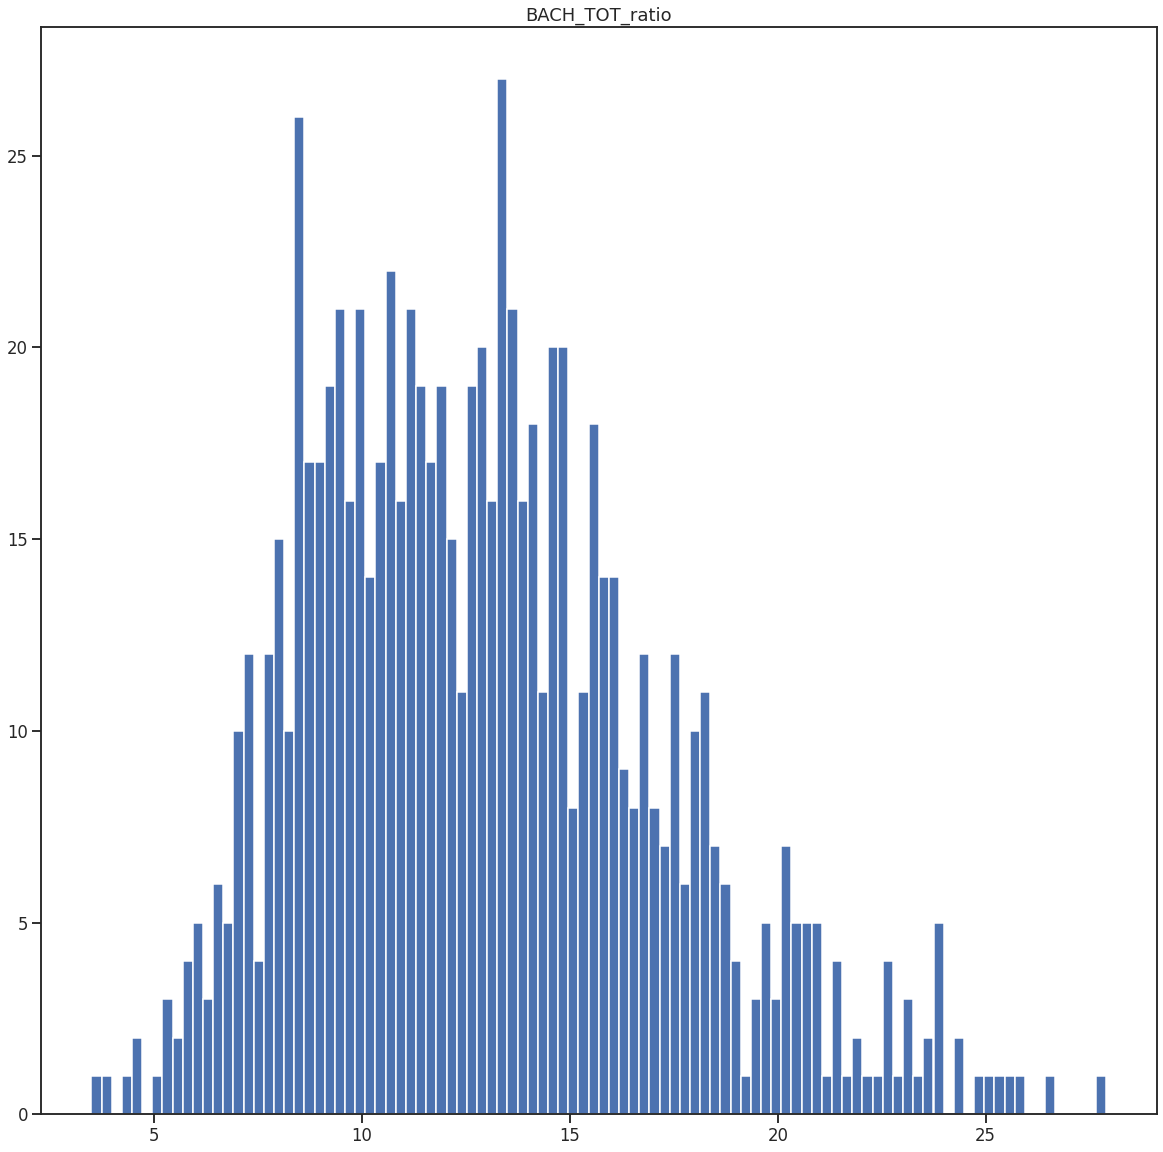

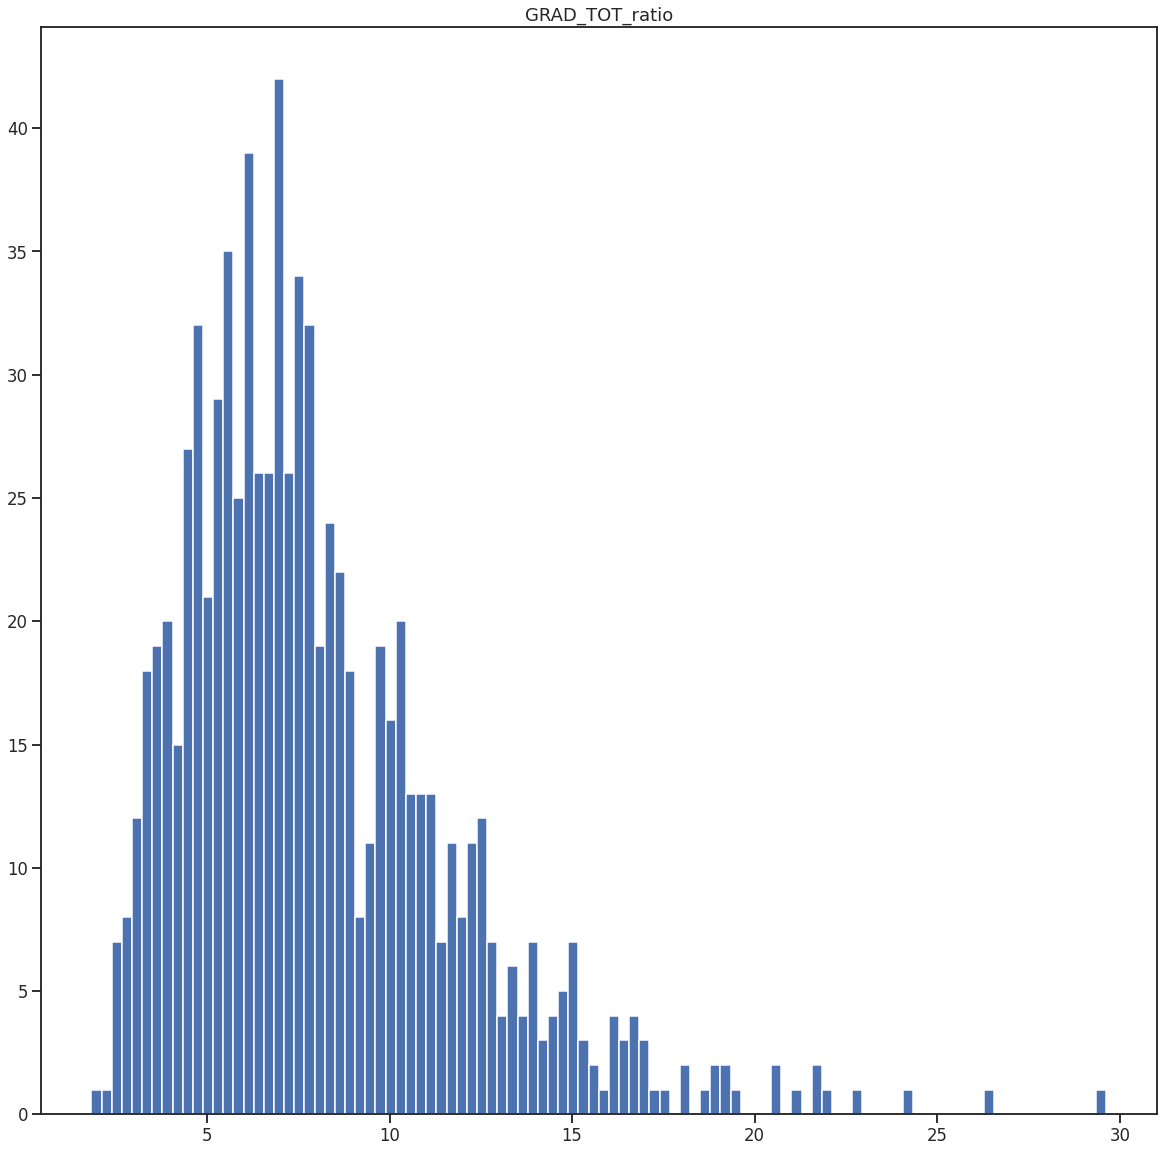

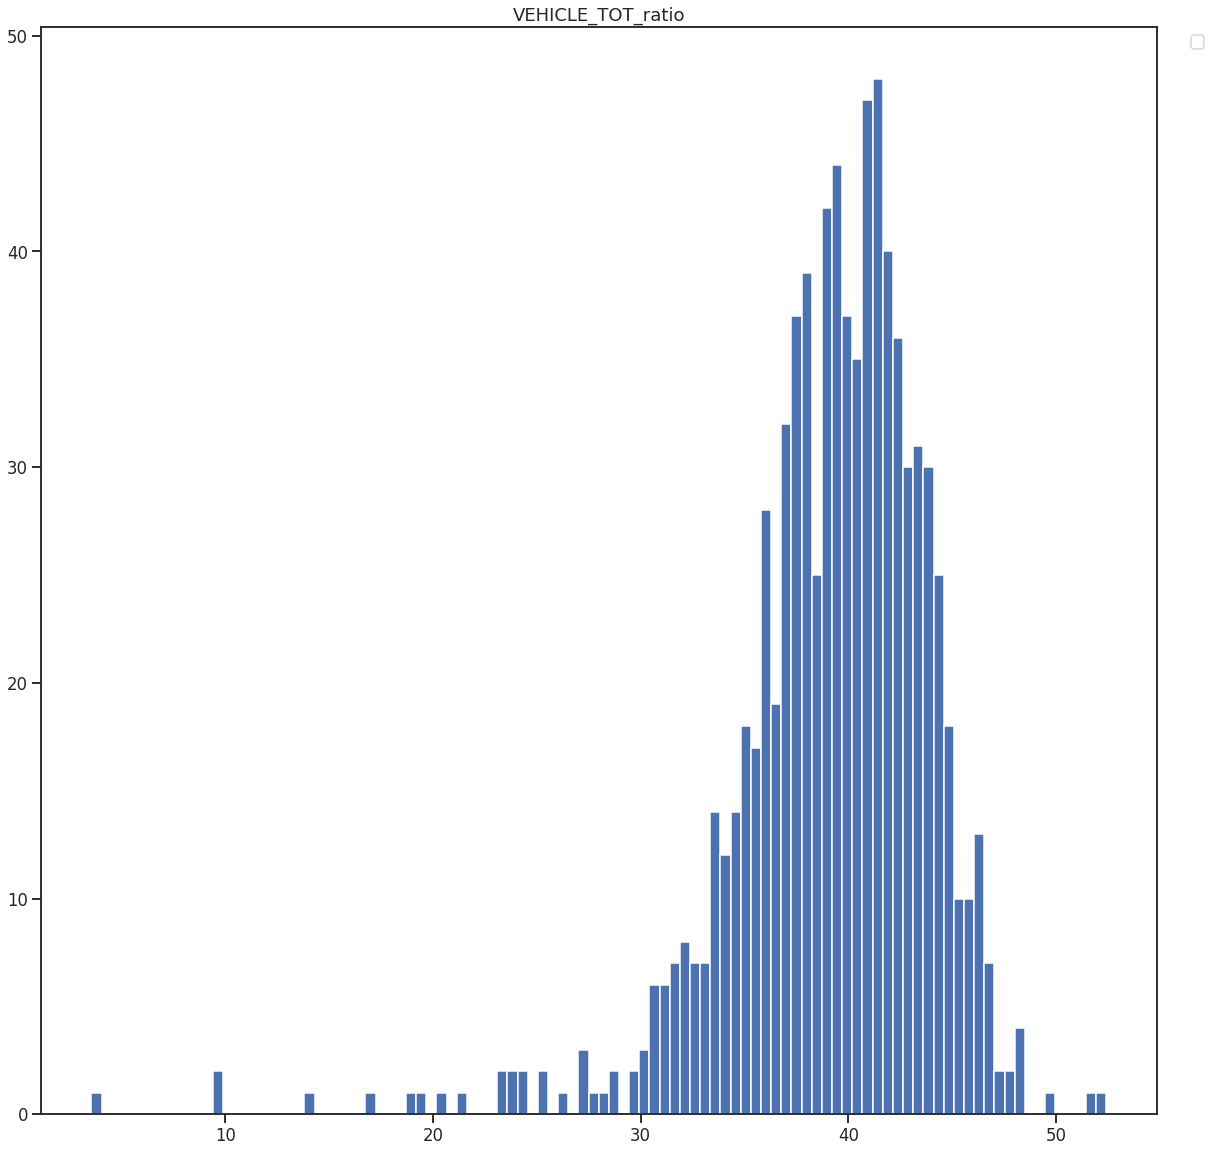

In [45]:
edu_veh_ratio = educ_vehicle_2019.columns.values[4:]
edu_veh_ratio
for ratio in edu_veh_ratio:
    fig, ax = plt.subplots(figsize=(20,20))

    plt.title(ratio)
    ax.hist(educ_vehicle_2019[ratio], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

* No negative values
* distributions appear plausible; (appears there are less graduate rates in 2019 compared to 2017)
* few outliers in edu total graduates and less than high school educations

# Merge data
* merge poverty rates for 2017-2019 into one dataframe
* merge education and vehicle rates for 2017-2019 into one dataframe

In [46]:
pov_rate_2017.rename(columns={'Poverty Percent, All Ages':'Poverty Percent, All Ages 2017'}, inplace=True)
pov_rate_2018.rename(columns={'Poverty Percent, All Ages':'Poverty Percent, All Ages 2018'}, inplace=True)
pov_rate_2019.rename(columns={'Poverty Percent, All Ages':'Poverty Percent, All Ages 2019'}, inplace=True)
# mass_inc_aqi_19 = pd.merge(mass_incomes, mass_aqi_19, on='GeoFIPS')
# mass_inc_aqi_dem_19 = pd.merge(mass_inc_aqi_19, mass_dem_ratio_19, on='GeoFIPS')
pov_rate_2017_2018 = pd.merge(pov_rate_2017, pov_rate_2018, how='inner')
pov_rate_2017_2019 = pd.merge(pov_rate_2017_2018, pov_rate_2019, how='inner')
pov_rate_2017_2019

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages 2017","Poverty Percent, All Ages 2018","Poverty Percent, All Ages 2019"
0,001,AL,Autauga County,13.400000,13.800000,12.100000
1,003,AL,Baldwin County,10.100000,9.800000,10.100000
2,005,AL,Barbour County,33.400002,30.900000,27.100000
3,007,AL,Bibb County,20.200001,21.799999,20.299999
4,009,AL,Blount County,12.800000,13.200000,16.299999
...,...,...,...,...,...,...
3001,037,WY,Sweetwater County,10.000000,8.400000,8.300000
3002,039,WY,Teton County,5.800000,6.300000,6.000000
3003,041,WY,Uinta County,10.200000,10.000000,8.500000
3004,043,WY,Washakie County,10.700000,11.900000,11.100000


In [47]:
# educ_vehicle_2017.columns[4:] = [(col) + '_17' for col in educ_vehicle_2017.columns[4:]]
educ_vehicle_ratios = educ_vehicle_2017.columns[4:]
for ratio in educ_vehicle_ratios:
    educ_vehicle_2017.rename(columns={ratio:ratio + '_2017'}, inplace=True)
    educ_vehicle_2018.rename(columns={ratio:ratio + '_2018'}, inplace=True)
    educ_vehicle_2019.rename(columns={ratio:ratio + '_2019'}, inplace=True)

educ_vehicle_2017.drop('POP', axis=1, inplace=True)
educ_vehicle_2018.drop('POP', axis=1, inplace=True)
educ_vehicle_2019.drop('POP', axis=1, inplace=True)

In [48]:
educ_vehicle_2017_2018 = pd.merge(educ_vehicle_2017, educ_vehicle_2018, how='inner')
educ_vehicle_2017_2019 = pd.merge(educ_vehicle_2017_2018, educ_vehicle_2019, how='inner')
educ_vehicle_2017_2019


,NAME,state,county,EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,BACH_TOT_ratio_2017,GRAD_TOT_ratio_2017,VEHICLE_TOT_ratio_2017,...,BACH_TOT_ratio_2018,GRAD_TOT_ratio_2018,VEHICLE_TOT_ratio_2018,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019
0,"St. Lawrence County, New York",36,89,66.185928,8.359560,23.588116,18.327358,7.552247,8.358647,32.766846,...,7.361611,7.866947,35.461420,67.044737,8.564136,23.762762,19.480230,8.060145,7.177464,31.232597
1,"Saratoga County, New York",36,91,71.525086,4.635684,16.980541,19.820419,16.481561,13.606880,45.984887,...,16.692083,13.376173,46.076042,72.095118,4.492676,17.754924,19.172290,17.466056,13.209172,45.281320
2,"Schenectady County, New York",36,93,69.072735,6.482821,20.662745,22.667695,11.062900,8.196574,38.755504,...,11.787576,10.642420,38.725459,70.183324,5.047682,20.198456,20.343982,14.569959,10.023245,38.615831
3,"Steuben County, New York",36,101,70.638028,6.761459,26.921199,21.483990,7.738806,7.732574,36.959525,...,8.302017,9.023341,38.738569,71.044989,6.093585,25.791841,21.817171,8.456788,8.885604,37.225175
4,"Suffolk County, New York",36,103,69.456038,6.873693,18.559191,18.702062,13.936407,11.384685,41.375382,...,13.946120,11.819717,41.403545,70.148605,6.397598,18.389192,18.517663,14.495114,12.349037,42.622211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,"Putnam County, New York",36,79,71.933993,5.124694,20.737392,18.218338,15.030758,12.822810,42.683970,...,16.365328,13.018242,40.700967,73.443857,5.721115,19.355167,20.396664,15.500407,12.470504,43.144833
832,"Queens County, New York",36,81,71.878018,12.930820,20.936054,15.809711,14.245424,7.956009,16.619308,...,15.182197,8.990191,17.077931,72.484558,12.328372,19.812340,16.300805,14.831103,9.211938,17.209159
833,"Rensselaer County, New York",36,83,69.525175,5.694269,19.865767,21.884274,12.611287,9.469578,41.146492,...,13.420554,8.401801,42.175211,70.327759,5.902441,19.919478,19.870963,13.165820,11.469058,41.341659
834,"Richmond County, New York",36,85,69.678470,8.140650,21.009139,17.452832,13.788069,9.287779,26.693683,...,14.675154,9.263113,26.658042,70.041143,7.701258,20.426427,16.545240,15.103446,10.264773,27.038096


# Add NE AQI and County demographic data


# Retrieve NE AQI data

In [49]:
NE_States_17 = get_NE_States(daily_aqi_by_county_2017, 'State Code')
NE_States_18 = get_NE_States(daily_aqi_by_county_2018, 'State Code')
NE_States_19 = get_NE_States(daily_aqi_by_county_2019, 'State Code')

NE_aqi_2017 = daily_aqi_by_county_2017.loc[NE_States_17]
NE_aqi_2018 = daily_aqi_by_county_2018.loc[NE_States_18]
NE_aqi_2019 = daily_aqi_by_county_2019.loc[NE_States_19]

# mean_NE_AQI_2017 = NE_aqi_2017.groupby('county Name').mean()
# mean_NE_AQI_2018 = NE_aqi_2018.groupby('county Name').mean()
# mean_NE_AQI_2019 = NE_aqi_2019.groupby('county Name').mean()

* Do not group by county name alone as we have county names that are same; we should group by fips

* Merge NE AQI into one data set of 2017-2019

In [50]:
# add GeoFIPS for mass_aqi_2019
def get_df_with_geofips(df, state_code, county_code):
    ''' Returns dataframe with geofips column '''
    state_code = df[state_code].astype(str).values
    county_code = df[county_code].astype(str).values

    geofips = []
    for stateID, countyID in zip(state_code, county_code):
        id = ''
        stateLen = len(stateID)
        countyLen = len(countyID)
        if(stateLen < 2):
            id += '0' + stateID
        else:
            id += stateID
        if(countyLen == 1):
            id += '00' + countyID
        elif(countyLen == 2):
            id += '0' + countyID
        else:
            id += countyID
        geofips.append(id)

    df.insert(loc=0, column='GeoFIPS', value=geofips)
    return df

NE_aqi_2017 = get_df_with_geofips(NE_aqi_2017, 'State Code', 'County Code')
NE_aqi_2018 = get_df_with_geofips(NE_aqi_2018, 'State Code', 'County Code')
NE_aqi_2019 = get_df_with_geofips(NE_aqi_2019, 'State Code', 'County Code')

In [51]:
cols_to_remove = ['Defining Site', 'Number of Sites Reporting', 'State Code', 'County Code']
NE_aqi_2017 = remove_col(NE_aqi_2017, cols_to_remove)
NE_aqi_2018 = remove_col(NE_aqi_2018, cols_to_remove)
NE_aqi_2019 = remove_col(NE_aqi_2019, cols_to_remove)

* Defining site and Number of Sites Reporting columns removed
* Removed due data with lack of variety
* county and state code removed due to having geofips code which represents both values

In [52]:
AQI_metrics = NE_aqi_2017.columns[3:]

for metric in AQI_metrics:
    NE_aqi_2017.rename(columns={metric:metric + '_2017'}, inplace=True)
    NE_aqi_2018.rename(columns={metric:metric + '_2018'}, inplace=True)
    NE_aqi_2019.rename(columns={metric:metric + '_2019'}, inplace=True)


* Give appropriate year name to columns to distinguish them before merging

In [53]:
print(NE_aqi_2017.columns)
average_NE_aqi_2017 = NE_aqi_2017.groupby(['GeoFIPS', 'State Name', 'county Name'], as_index=False)[['AQI_2017']].mean()
average_NE_aqi_2018 = NE_aqi_2018.groupby(['GeoFIPS', 'State Name', 'county Name'], as_index=False)[['AQI_2018']].mean()
average_NE_aqi_2019 = NE_aqi_2019.groupby(['GeoFIPS', 'State Name', 'county Name'], as_index=False)[['AQI_2019']].mean()

display(average_NE_aqi_2017)
display(average_NE_aqi_2018)
display(average_NE_aqi_2019)

Index(['GeoFIPS', 'State Name', 'county Name', 'Date_2017', 'AQI_2017',
       'Category_2017', 'Defining Parameter_2017'],
      dtype='object')


,GeoFIPS,State Name,county Name,AQI_2017
0,09001,Connecticut,Fairfield,46.315068
1,09003,Connecticut,Hartford,43.202740
2,09005,Connecticut,Litchfield,38.250689
3,09007,Connecticut,Middlesex,44.028986
4,09009,Connecticut,New Haven,44.789041
...,...,...,...,...
143,42133,Pennsylvania,York,44.241096
144,50003,Vermont,Bennington,36.271978
145,50007,Vermont,Chittenden,35.632877
146,50021,Vermont,Rutland,38.172603


,GeoFIPS,State Name,county Name,AQI_2018
0,09001,Connecticut,Fairfield,47.904110
1,09003,Connecticut,Hartford,40.594521
2,09005,Connecticut,Litchfield,38.449036
3,09007,Connecticut,Middlesex,43.875000
4,09009,Connecticut,New Haven,45.509589
...,...,...,...,...
144,42133,Pennsylvania,York,41.961644
145,50003,Vermont,Bennington,36.186301
146,50007,Vermont,Chittenden,38.520548
147,50021,Vermont,Rutland,38.780822


,GeoFIPS,State Name,county Name,AQI_2019
0,09001,Connecticut,Fairfield,46.495890
1,09003,Connecticut,Hartford,41.490411
2,09005,Connecticut,Litchfield,38.564384
3,09007,Connecticut,Middlesex,44.487805
4,09009,Connecticut,New Haven,46.090411
...,...,...,...,...
145,42133,Pennsylvania,York,41.761644
146,50003,Vermont,Bennington,35.994521
147,50007,Vermont,Chittenden,37.457534
148,50021,Vermont,Rutland,38.273973


In [54]:
avg_NE_aqi_2017_2018 = pd.merge(average_NE_aqi_2017, average_NE_aqi_2018, how='inner')
avg_NE_aqi_2017_2019 = pd.merge(avg_NE_aqi_2017_2018, average_NE_aqi_2019, how='inner')
avg_NE_aqi_2017_2019

,GeoFIPS,State Name,county Name,AQI_2017,AQI_2018,AQI_2019
0,09001,Connecticut,Fairfield,46.315068,47.904110,46.495890
1,09003,Connecticut,Hartford,43.202740,40.594521,41.490411
2,09005,Connecticut,Litchfield,38.250689,38.449036,38.564384
3,09007,Connecticut,Middlesex,44.028986,43.875000,44.487805
4,09009,Connecticut,New Haven,44.789041,45.509589,46.090411
...,...,...,...,...,...,...
142,42133,Pennsylvania,York,44.241096,41.961644,41.761644
143,50003,Vermont,Bennington,36.271978,36.186301,35.994521
144,50007,Vermont,Chittenden,35.632877,38.520548,37.457534
145,50021,Vermont,Rutland,38.172603,38.780822,38.273973


# Retrieve NE demographic data


In [55]:
NE_counties = get_NE_States(county_demographic, 'STATE')
NE_dems = county_demographic.loc[NE_counties]

NE_dems = NE_dems.loc[NE_dems.YEAR > 9]
# keep only totals of dem; disregard ages
NE_dems = NE_dems.loc[NE_dems.AGEGRP == 0]
NE_dems

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
70395,50,9,1,Connecticut,Fairfield County,10,0,943038,459242,483796,...,82722,80901,9880,10463,2811,2488,1073,888,724,527
70414,50,9,1,Connecticut,Fairfield County,11,0,943971,459794,484177,...,84420,82945,10250,10816,2898,2645,1119,934,712,562
70433,50,9,1,Connecticut,Fairfield County,12,0,943332,459410,483922,...,85628,84584,10644,11169,3010,2699,1130,940,728,563
70623,50,9,3,Connecticut,Hartford County,10,0,893076,433833,459243,...,65718,68349,12455,13855,2621,2676,1148,1083,611,452
70642,50,9,3,Connecticut,Hartford County,11,0,892580,433437,459143,...,67247,70124,12699,14250,2688,2792,1182,1084,632,463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642694,50,50,25,Vermont,Windham County,11,0,42635,20888,21747,...,499,430,51,63,34,29,11,10,8,2
642713,50,50,25,Vermont,Windham County,12,0,42222,20663,21559,...,491,433,50,62,31,28,14,12,5,2
642903,50,50,27,Vermont,Windsor County,10,0,55224,26961,28263,...,420,418,39,37,28,32,15,14,3,3
642922,50,50,27,Vermont,Windsor County,11,0,55204,26986,28218,...,467,431,42,34,30,33,13,10,5,2


* NE_dems contains all county demographic data for North Eastern US
* Only 2017-2019 data is retained
* All age groups are considered for ethnicities

In [56]:
demographic = NE_dems.columns.values[8:]
NE_dem_ratio = NE_dems

for dem in demographic:
    NE_dem_ratio[dem] = NE_dems[dem] / NE_dems['TOT_POP'] * 100
    NE_dem_ratio.rename(columns={dem:dem + '_ratio'}, inplace=True)

display(NE_dem_ratio)

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE_ratio,TOT_FEMALE_ratio,...,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
70395,50,9,1,Connecticut,Fairfield County,10,0,943038,48.698144,51.301856,...,8.771863,8.578764,1.047678,1.109499,0.298079,0.263828,0.113781,0.094164,0.076773,0.055883
70414,50,9,1,Connecticut,Fairfield County,11,0,943971,48.708488,51.291512,...,8.943071,8.786817,1.085838,1.145798,0.307001,0.280199,0.118542,0.098944,0.075426,0.059536
70433,50,9,1,Connecticut,Fairfield County,12,0,943332,48.700776,51.299224,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
70623,50,9,3,Connecticut,Hartford County,10,0,893076,48.577389,51.422611,...,7.358612,7.653212,1.394618,1.551380,0.293480,0.299639,0.128544,0.121266,0.068415,0.050612
70642,50,9,3,Connecticut,Hartford County,11,0,892580,48.560017,51.439983,...,7.534003,7.856327,1.422730,1.596496,0.301149,0.312801,0.132425,0.121446,0.070806,0.051872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642694,50,50,25,Vermont,Windham County,11,0,42635,48.992612,51.007388,...,1.170400,1.008561,0.119620,0.147766,0.079747,0.068019,0.025800,0.023455,0.018764,0.004691
642713,50,50,25,Vermont,Windham County,12,0,42222,48.938942,51.061058,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737
642903,50,50,27,Vermont,Windsor County,10,0,55224,48.821165,51.178835,...,0.760539,0.756917,0.070621,0.067000,0.050703,0.057946,0.027162,0.025351,0.005432,0.005432
642922,50,50,27,Vermont,Windsor County,11,0,55204,48.884139,51.115861,...,0.845953,0.780741,0.076081,0.061590,0.054344,0.059778,0.023549,0.018115,0.009057,0.003623


* Columns of demographic ratios are produced
* Ratios are demographic / county population


In [57]:
NE_dem_ratio = get_df_with_geofips(NE_dem_ratio, 'STATE', 'COUNTY')

In [58]:
cols_to_remove =  ['AGEGRP', 'STATE', 'COUNTY', 'SUMLEV']
NE_dem_ratio = remove_col(NE_dem_ratio, cols_to_remove)
display(NE_dem_ratio)

,GeoFIPS,STNAME,CTYNAME,YEAR,TOT_POP,TOT_MALE_ratio,TOT_FEMALE_ratio,WA_MALE_ratio,WA_FEMALE_ratio,BA_MALE_ratio,...,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
70395,09001,Connecticut,Fairfield County,10,943038,48.698144,51.301856,38.829612,40.207712,5.820020,...,8.771863,8.578764,1.047678,1.109499,0.298079,0.263828,0.113781,0.094164,0.076773,0.055883
70414,09001,Connecticut,Fairfield County,11,943971,48.708488,51.291512,38.687417,40.050171,5.881748,...,8.943071,8.786817,1.085838,1.145798,0.307001,0.280199,0.118542,0.098944,0.075426,0.059536
70433,09001,Connecticut,Fairfield County,12,943332,48.700776,51.299224,38.498959,39.859350,5.985591,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
70623,09003,Connecticut,Hartford County,10,893076,48.577389,51.422611,36.713113,38.908671,7.458828,...,7.358612,7.653212,1.394618,1.551380,0.293480,0.299639,0.128544,0.121266,0.068415,0.050612
70642,09003,Connecticut,Hartford County,11,892580,48.560017,51.439983,36.519192,38.706895,7.483027,...,7.534003,7.856327,1.422730,1.596496,0.301149,0.312801,0.132425,0.121446,0.070806,0.051872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642694,50025,Vermont,Windham County,11,42635,48.992612,51.007388,46.443063,48.349947,0.884250,...,1.170400,1.008561,0.119620,0.147766,0.079747,0.068019,0.025800,0.023455,0.018764,0.004691
642713,50025,Vermont,Windham County,12,42222,48.938942,51.061058,46.336033,48.365781,0.935531,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737
642903,50027,Vermont,Windsor County,10,55224,48.821165,51.178835,46.892655,49.239461,0.505215,...,0.760539,0.756917,0.070621,0.067000,0.050703,0.057946,0.027162,0.025351,0.005432,0.005432
642922,50027,Vermont,Windsor County,11,55204,48.884139,51.115861,46.882472,49.179407,0.518078,...,0.845953,0.780741,0.076081,0.061590,0.054344,0.059778,0.023549,0.018115,0.009057,0.003623


* GeoFIPS column added
* Redundant column removes and columns with lack of data variety

In [59]:
NE_dem_ratio_17 = NE_dem_ratio.loc[NE_dems.YEAR == 10]
NE_dem_ratio_18 = NE_dem_ratio.loc[NE_dems.YEAR == 11]
NE_dem_ratio_19 = NE_dem_ratio.loc[NE_dems.YEAR == 12]

NE_dem_ratio_17.drop('YEAR', axis=1, inplace=True)
NE_dem_ratio_18.drop('YEAR', axis=1, inplace=True)
NE_dem_ratio_19.drop('YEAR', axis=1, inplace=True)

/home/wkc/.local/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Merge demographic years as one spanning 2017-2019


In [60]:
# add suffix to each column name then merge
demographic = NE_dem_ratio_17.columns.values[3:]

for dem in demographic:
    NE_dem_ratio_17.rename(columns={dem:dem + '_2017'}, inplace=True)
    NE_dem_ratio_18.rename(columns={dem:dem + '_2018'}, inplace=True)
    NE_dem_ratio_19.rename(columns={dem:dem + '_2019'}, inplace=True)

/home/wkc/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [61]:
NE_dem_ratio_2017_2018 = pd.merge(NE_dem_ratio_17, NE_dem_ratio_18, how='inner')
NE_dem_ratio_2017_2019 = pd.merge(NE_dem_ratio_2017_2018, NE_dem_ratio_19, how='inner')
NE_dem_ratio_2017_2019.shape

(239, 222)

* demographic data 2017-2019 data is merged as one set
* column names are sufficed by year

# saved cleaned up datasets


In [62]:
data_path = r'../../data/processed/clean_acs1_edu_vehicle_2017_2019.csv'
educ_vehicle_2017_2019.to_csv(data_path, index=False)

data_path = r'../../data/processed/clean_pov_rate_2017_2019.csv'
pov_rate_2017_2019.to_csv(data_path, index=False)

data_path = r'../../data/processed/clean_UE_rate_2017_2019.csv'
UE_county_rate.to_csv(data_path, index=False)

data_path = r'../../data/processed/clean_avg_NE_aqi_2017_2019'
avg_NE_aqi_2017_2019.to_csv(data_path, index=False)

data_path = r'../../data/processed/clean_NE_dem_ratio_2017_2019.csv'
NE_dem_ratio_2017_2019.to_csv(data_path, index=False)
